# **Project EDA**



---



##**A. Persiapan dan Pemeriksaan Awal Dataset**

###**1. Impor Library**

In [ ]:
import warnings

import os
import math
import numpy as np
import pandas as pd
from IPython.display import display
from google.colab import drive

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#Mengatur format gambar menjadi retina, sehingga grafik lebih tajam dan berkualitas tinggi
%config InlineBackend.figure_format = 'retina'

###**2. Impor dan Baca Dataset**
Data yang diambil merupakan data capaian Kinerja Pengelolaan Sampah Nasional yang mencakup timbulan sampah, pengelolaan sampah, penanganan sampah, sampah terkelola, sampai daur ulang sampah secara tahunan dari 2019-2023 dengan jumlah entri sebanyak 1,394 entries.

Sumber Data: https://sipsn.menlhk.go.id/sipsn/public/data/capaian

In [ ]:
# Define the variable
folder_name = "/content/drive/My Drive/Colab Notebooks/BigData"

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

df =pd.read_csv(f'{folder_name}/Data_Capaian_SIPSN_KLHK.csv', sep=';', skipinitialspace=True)

# Tampilkan beberapa baris pertama dan informasi dataset
df.head(5)

Mounted at /content/drive


Tahun Provinsi      Kabupaten/Kota Timbulan Sampah Tahunan (ton/tahun)(A)  \
0   2023     Aceh   Kab. Aceh Selatan                              35.323,53   
1   2023     Aceh  Kab. Aceh Tenggara                              41.666,21   
2   2023     Aceh     Kab. Aceh Timur                              65.670,22   
3   2023     Aceh    Kab. Aceh Tengah                              40.050,24   
4   2023     Aceh     Kab. Aceh Barat                              36.813,72   

  Pengurangan Sampah Tahunan (ton/tahun)(B) %Pengurangan Sampah(B/A)  \
0                                    113,25                     0,32   
1                                     25,55                     0,06   
2                                  1.044,80                     1,59   
3                                  1.093,18                     2,73   
4                                  3.322,76                     9,03   

  Penanganan Sampah Tahunan (ton/tahun)(C) %Penanganan Sampah(C/A)  \
0                                12.775,00                   36,17   
1                                 7.227,00                   17,34   
2                                22.747,55                   34,64   
3                                22.630,00                    56,5   
4                                30.502,76                   82,86   

  Sampah Terkelola Tahunan (ton/tahun)(B+C) %Sampah Terkelola(B+C)/A  \
0                                 12.888,25                    36,49   
1                                  7.252,55                    17,41   
2                                 23.792,35                    36,23   
3                                 23.723,18                    59,23   
4                                 33.825,52                    91,88   

  Daur ulang Sampah Tahunan (ton/tahun)(D)  \
0                                    67,89   
1                                      NaN   
2                                   857,75   
3                                 1.093,18   
4                                 1.423,50   

  Bahan baku Sampah Tahunan (ton/tahun)(E) Recycling Rate(D+E)/A P1/P2  
0                                      NaN                  0,19   P 2  
1                                      NaN                     0   P 2  
2                                      NaN                  1,31   P 2  
3                                      NaN                  2,73   P 2  
4                                      NaN                  3,87   P 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Tahun                                      1394 non-null   int64 
 1   Provinsi                                   1394 non-null   object
 2   Kabupaten/Kota                             1394 non-null   object
 3   Timbulan Sampah Tahunan (ton/tahun)(A)     1394 non-null   object
 4   Pengurangan Sampah Tahunan (ton/tahun)(B)  1356 non-null   object
 5   %Pengurangan Sampah(B/A)                   1356 non-null   object
 6   Penanganan Sampah Tahunan (ton/tahun)(C)   1378 non-null   object
 7   %Penanganan Sampah(C/A)                    1378 non-null   object
 8   Sampah Terkelola Tahunan (ton/tahun)(B+C)  1394 non-null   object
 9   %Sampah Terkelola(B+C)/A                   1394 non-null   object
 10  Daur ulang Sampah Tahunan (ton/tahun

In [ ]:
print(df.dtypes)

Tahun                                         int64
Provinsi                                     object
Kabupaten/Kota                               object
Timbulan Sampah Tahunan (ton/tahun)(A)       object
Pengurangan Sampah Tahunan (ton/tahun)(B)    object
%Pengurangan Sampah(B/A)                     object
Penanganan Sampah Tahunan (ton/tahun)(C)     object
%Penanganan Sampah(C/A)                      object
Sampah Terkelola Tahunan (ton/tahun)(B+C)    object
%Sampah Terkelola(B+C)/A                     object
Daur ulang Sampah Tahunan (ton/tahun)(D)     object
Bahan baku Sampah Tahunan (ton/tahun)(E)     object
Recycling Rate(D+E)/A                        object
P1/P2                                        object
dtype: object


In [ ]:
print(df.columns)


Index(['Tahun', 'Provinsi', 'Kabupaten/Kota',
       'Timbulan Sampah Tahunan (ton/tahun)(A)',
       'Pengurangan Sampah Tahunan (ton/tahun)(B)', '%Pengurangan Sampah(B/A)',
       'Penanganan Sampah Tahunan (ton/tahun)(C)', '%Penanganan Sampah(C/A)',
       'Sampah Terkelola Tahunan (ton/tahun)(B+C)', '%Sampah Terkelola(B+C)/A',
       'Daur ulang Sampah Tahunan (ton/tahun)(D)',
       'Bahan baku Sampah Tahunan (ton/tahun)(E)', 'Recycling Rate(D+E)/A',
       'P1/P2'],
      dtype='object')


***Penjelasan atau Deskripsi:***

Berdasarkan informasi di atas, ditemukan bahwa:

1.   Beberapa kolom yang seharusnya memiliki tipe data numerik justru terdeteksi sebagai tipe data objek. Oleh karena itu, diperlukan penyesuaian atau perbaikan tipe data agar sesuai dengan jenis datanya, yakni diubah menjadi tipe numerik.
2.   Terdapat beberapa kolom yang memiliki missing value, sehingga perlu dilakukan pengecekan dan penanganan terhadap missing value

###**3. Memperbaiki tipe data (string ke float)**

In [ ]:
# Fungsi untuk membersihkan dan mengonversi string ke float
def convert_to_float(value):
    # Pastikan hanya string yang diproses
    if isinstance(value, str):
        # Menghapus titik ribuan dan mengganti koma dengan titik desimal
        value = value.replace('.', '').replace(',', '.')
        return float(value)
    return value  # Kembalikan nilai yang bukan string tanpa perubahan

# Define the list of columns to convert
cols_to_convert = ['Timbulan Sampah Tahunan (ton/tahun)(A)',
                   'Pengurangan Sampah Tahunan (ton/tahun)(B)',
                   '%Pengurangan Sampah(B/A)',
                   'Penanganan Sampah Tahunan (ton/tahun)(C)',
                   '%Penanganan Sampah(C/A)',
                   'Sampah Terkelola Tahunan (ton/tahun)(B+C)',
                   '%Sampah Terkelola(B+C)/A',
                   'Daur ulang Sampah Tahunan (ton/tahun)(D)',
                   'Bahan baku Sampah Tahunan (ton/tahun)(E)']

# Mengonversi kolom-kolom tersebut ke tipe float
for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_float)

In [ ]:
# Menghapus persen, mengganti koma dengan titik, dan mengonversi ke float
df['Recycling Rate(D+E)/A'] = df['Recycling Rate(D+E)/A'] \
    .str.replace('%', '') \
    .str.replace(',', '.') \
    .astype(float)

In [ ]:
print(df.shape)

# Memeriksa tipe data setelah konversi
print(df.dtypes)

(1394, 14)
Tahun                                          int64
Provinsi                                      object
Kabupaten/Kota                                object
Timbulan Sampah Tahunan (ton/tahun)(A)       float64
Pengurangan Sampah Tahunan (ton/tahun)(B)    float64
%Pengurangan Sampah(B/A)                     float64
Penanganan Sampah Tahunan (ton/tahun)(C)     float64
%Penanganan Sampah(C/A)                      float64
Sampah Terkelola Tahunan (ton/tahun)(B+C)    float64
%Sampah Terkelola(B+C)/A                     float64
Daur ulang Sampah Tahunan (ton/tahun)(D)     float64
Bahan baku Sampah Tahunan (ton/tahun)(E)     float64
Recycling Rate(D+E)/A                        float64
P1/P2                                         object
dtype: object


In [ ]:
df.head(5)

Tahun Provinsi      Kabupaten/Kota  Timbulan Sampah Tahunan (ton/tahun)(A)  \
0   2023     Aceh   Kab. Aceh Selatan                                35323.53   
1   2023     Aceh  Kab. Aceh Tenggara                                41666.21   
2   2023     Aceh     Kab. Aceh Timur                                65670.22   
3   2023     Aceh    Kab. Aceh Tengah                                40050.24   
4   2023     Aceh     Kab. Aceh Barat                                36813.72   

   Pengurangan Sampah Tahunan (ton/tahun)(B)  %Pengurangan Sampah(B/A)  \
0                                     113.25                      0.32   
1                                      25.55                      0.06   
2                                    1044.80                      1.59   
3                                    1093.18                      2.73   
4                                    3322.76                      9.03   

   Penanganan Sampah Tahunan (ton/tahun)(C)  %Penanganan Sampah(C/A)  \
0                                  12775.00                    36.17   
1                                   7227.00                    17.34   
2                                  22747.55                    34.64   
3                                  22630.00                    56.50   
4                                  30502.76                    82.86   

   Sampah Terkelola Tahunan (ton/tahun)(B+C)  %Sampah Terkelola(B+C)/A  \
0                                   12888.25                     36.49   
1                                    7252.55                     17.41   
2                                   23792.35                     36.23   
3                                   23723.18                     59.23   
4                                   33825.52                     91.88   

   Daur ulang Sampah Tahunan (ton/tahun)(D)  \
0                                     67.89   
1                                       NaN   
2                                    857.75   
3                                   1093.18   
4                                   1423.50   

   Bahan baku Sampah Tahunan (ton/tahun)(E)  Recycling Rate(D+E)/A P1/P2  
0                                       NaN                   0.19   P 2  
1                                       NaN                   0.00   P 2  
2                                       NaN                   1.31   P 2  
3                                       NaN                   2.73   P 2  
4                                       NaN                   3.87   P 2

###**4. Baca Dataset terkait Missing Value**

In [ ]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print("\nInformasi missing value pada dataset:")
print(missing_table)


Informasi missing value pada dataset:
                                           Total    Percent
Tahun                                          0   0.000000
Provinsi                                       0   0.000000
Kabupaten/Kota                                 0   0.000000
Timbulan Sampah Tahunan (ton/tahun)(A)         0   0.000000
Pengurangan Sampah Tahunan (ton/tahun)(B)     38   2.725968
%Pengurangan Sampah(B/A)                      38   2.725968
Penanganan Sampah Tahunan (ton/tahun)(C)      16   1.147776
%Penanganan Sampah(C/A)                       16   1.147776
Sampah Terkelola Tahunan (ton/tahun)(B+C)      0   0.000000
%Sampah Terkelola(B+C)/A                       0   0.000000
Daur ulang Sampah Tahunan (ton/tahun)(D)     172  12.338594
Bahan baku Sampah Tahunan (ton/tahun)(E)     713  51.147776
Recycling Rate(D+E)/A                          0   0.000000
P1/P2                                          0   0.000000


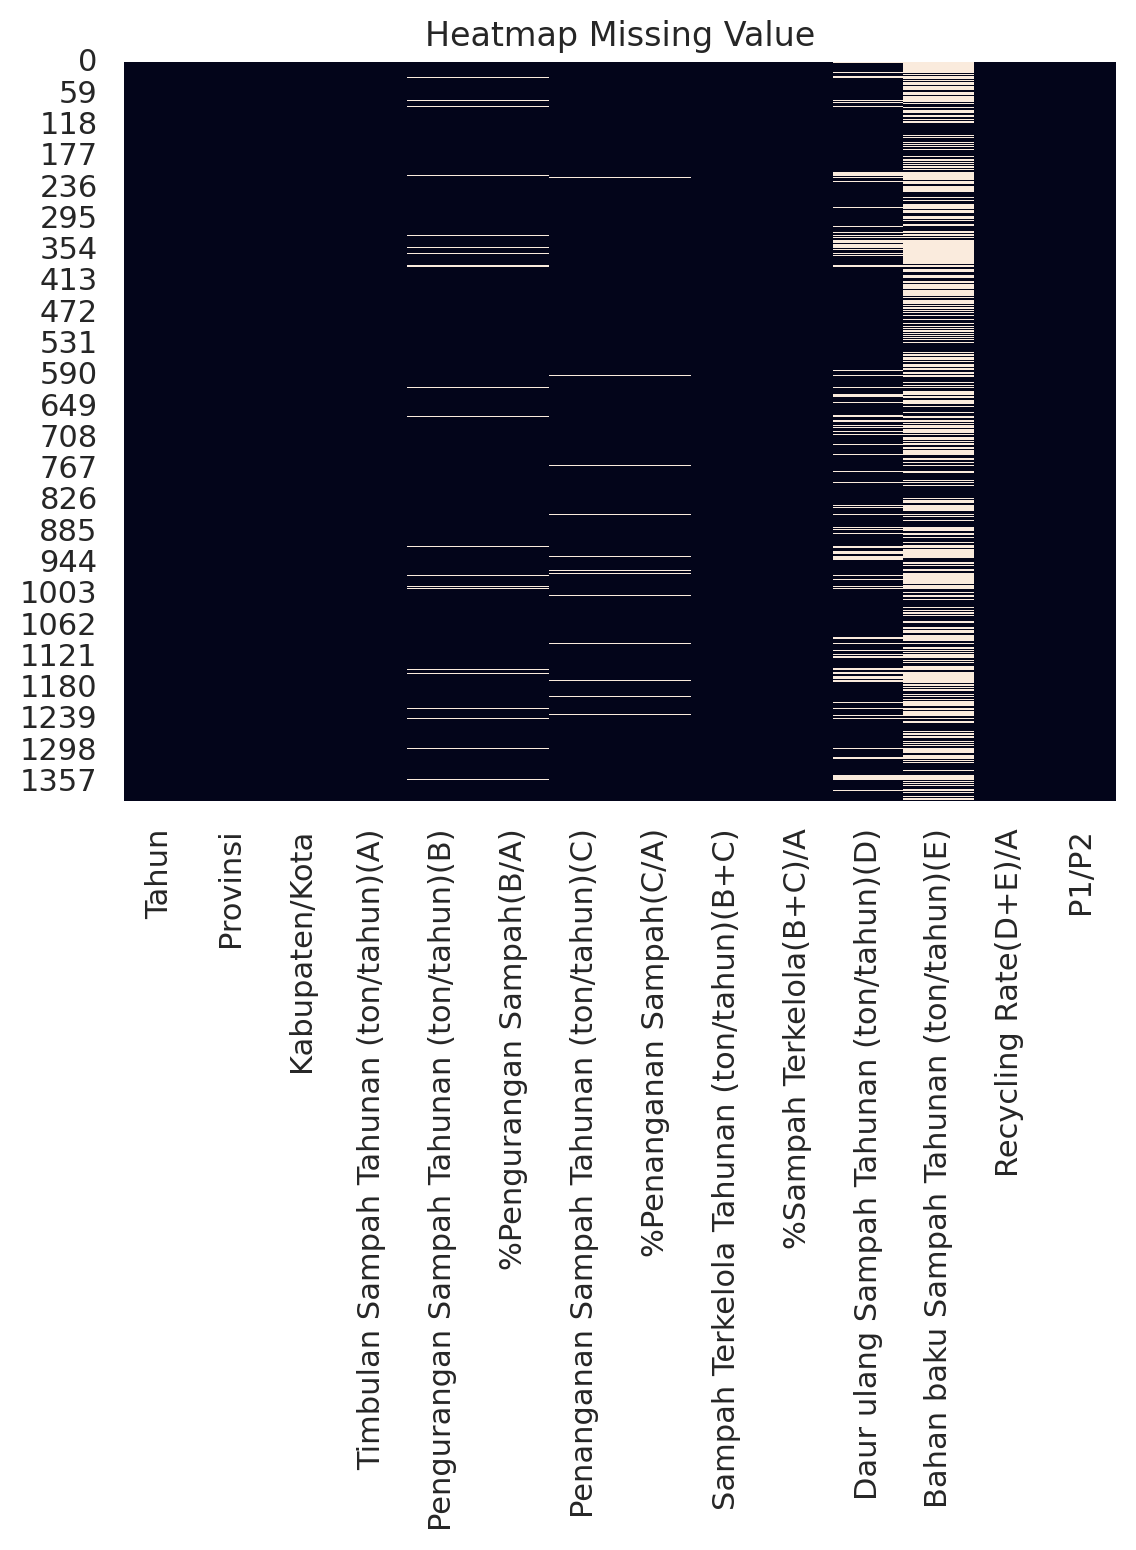

In [ ]:
#heatmap visualization untuk membantu dalam menggambarkan missing value dalam dataset
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

***Penjelasan atau Deskripsi:***

Dapat dilihat bahwa kolom yang paling banyak berisikan missing value adalah kolom **Bahan baku Sampah Tahunan (ton/tahun)(E)** yakni sebanyak 713, atau sebesar 51% dari keseluruhan dataset.

##**B. Visualisasi dan Analisis Dataset (Exploratory Data Analysis)**

###**1. Analisis Statistik Deskriptif**

In [ ]:
# Analisis Statistik Deskriptif

# Statistik deskriptif untuk variabel numerik
df.describe()

Tahun  Timbulan Sampah Tahunan (ton/tahun)(A)  \
count  1394.000000                             1394.000000   
mean   2021.260402                           115700.629613   
std       1.434493                           143519.831960   
min    2018.000000                             4143.330000   
25%    2020.000000                            31621.555000   
50%    2021.000000                            59434.540000   
75%    2023.000000                           141517.402500   
max    2023.000000                           971101.080000   

       Pengurangan Sampah Tahunan (ton/tahun)(B)  %Pengurangan Sampah(B/A)  \
count                                1356.000000               1356.000000   
mean                                16363.876254                 12.664757   
std                                 28255.882095                 13.011475   
min                                     0.000000                  0.000000   
25%                                  1546.287500                  3.345000   
50%                                  6411.710000                 11.595000   
75%                                 17587.515000                 19.552500   
max                                232200.210000                255.120000   

       Penanganan Sampah Tahunan (ton/tahun)(C)  %Penanganan Sampah(C/A)  \
count                               1378.000000              1378.000000   
mean                               55070.135044                44.523389   
std                                94694.297842                25.201778   
min                                    3.450000                 0.010000   
25%                                10618.867500                22.070000   
50%                                23334.325000                41.780000   
75%                                53893.162500                70.307500   
max                               719003.650000                98.950000   

       Sampah Terkelola Tahunan (ton/tahun)(B+C)  %Sampah Terkelola(B+C)/A  \
count                                1394.000000               1394.000000   
mean                                70355.855215                 56.331829   
std                                115460.468005                 30.874570   
min                                     0.000000                  0.000000   
25%                                 12826.560000                 30.382500   
50%                                 30442.540000                 56.045000   
75%                                 70259.637500                 82.077500   
max                                850758.030000                322.630000   

       Daur ulang Sampah Tahunan (ton/tahun)(D)  \
count                               1222.000000   
mean                               11551.378576   
std                                22473.163186   
min                                    0.000000   
25%                                  734.735000   
50%                                 3623.930000   
75%                                11580.520000   
max                               207464.220000   

       Bahan baku Sampah Tahunan (ton/tahun)(E)  Recycling Rate(D+E)/A  
count                                681.000000            1394.000000  
mean                                3632.536652               9.075782  
std                                14074.857017              12.675455  
min                                    0.000000               0.000000  
25%                                   59.080000               0.440000  
50%                                  315.910000               5.090000  
75%                                 1312.180000              14.815000  
max                               153947.780000             251.680000

*   Count (Jumlah total baris data yang valid (tidak kosong) untuk setiap kolom)
*   Mean (rata-rata nilai yang ada disetiap kolom)
*   std (standar deviasi, sejauh mana data tersebar dari rata-rata)
*   min (nilai terkecil yang ada disetiap kolom)
*   25% (kuartil pertama, 25% data lebih kecil dari nilai ini)
*   50% (Kuartil kedua, atau median, yaitu 50% data berada di bawah nilai ini)
*   75% (Kuartil ketiga, 75% data lebih kecil dari nilai ini)
*   max (nilai terbesar yang ada disetiap kolom)

In [ ]:
# Statistik deskriptif untuk variabel kategorikal
df.describe(include=['object'])

Provinsi Kabupaten/Kota P1/P2
count         1394           1394  1394
unique          38            438     1
top     Jawa Timur    Kab. Sambas   P 2
freq           152              5  1394

* count (Jumlah data non-null)
* unique (Jumlah kategori unik)
* top (Kategori yang paling sering muncul)
* freq (Frekuensi dari kategori yang paling sering muncul)

In [ ]:
# Distribusi target variable
df['P1/P2'].value_counts(normalize=True)

P1/P2
P 2    1.0
Name: proportion, dtype: float64

***Penjelasan atau Deskripsi:***

Tabel diatas menunjukkan distribusi hasil akhir dari dataset, dimana seluruh data dikategorikan kedalam P2, merujuk pada tingkat penanganan sampah, termasuk metode pengumpulan, pemrosesan, atau pembuangan akhir yang berkelanjutan. Sehingga dapat disimpulkan bahwa dataset ini menunjukkan ketidakseimbangan kelas (Class Imbalance).

###**2. Visualisasi**

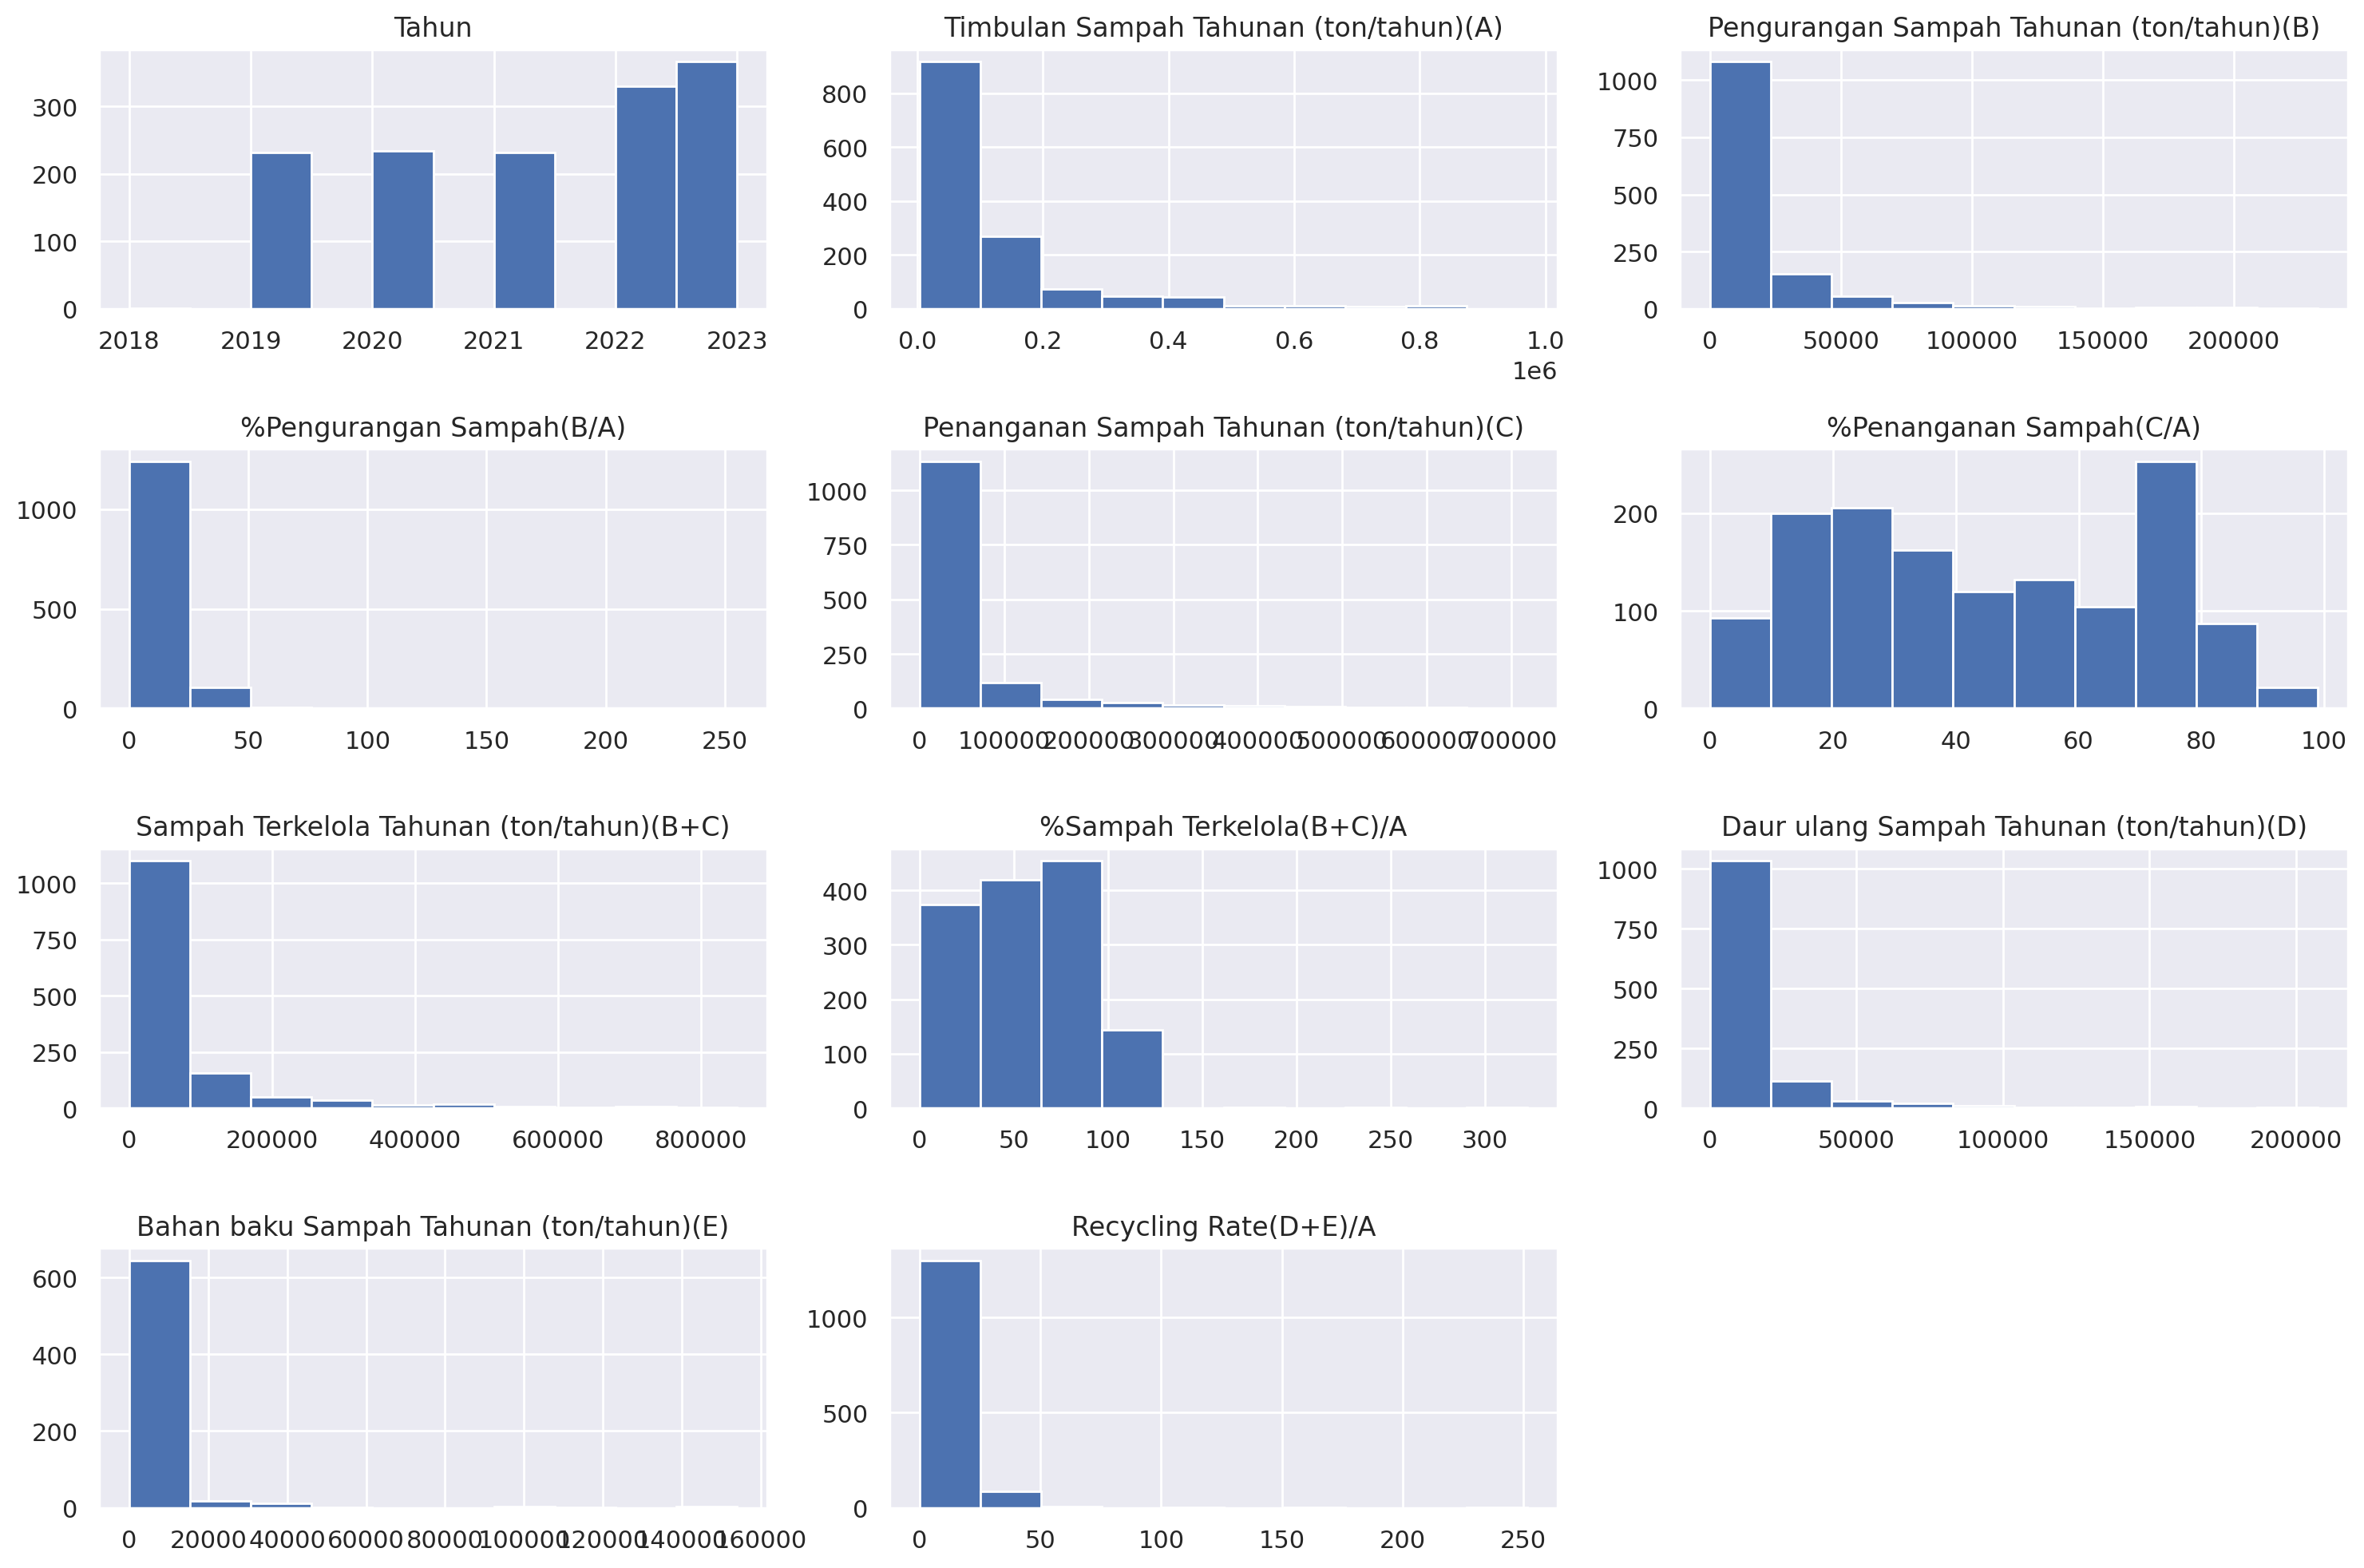

In [ ]:
# Visualisasi histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

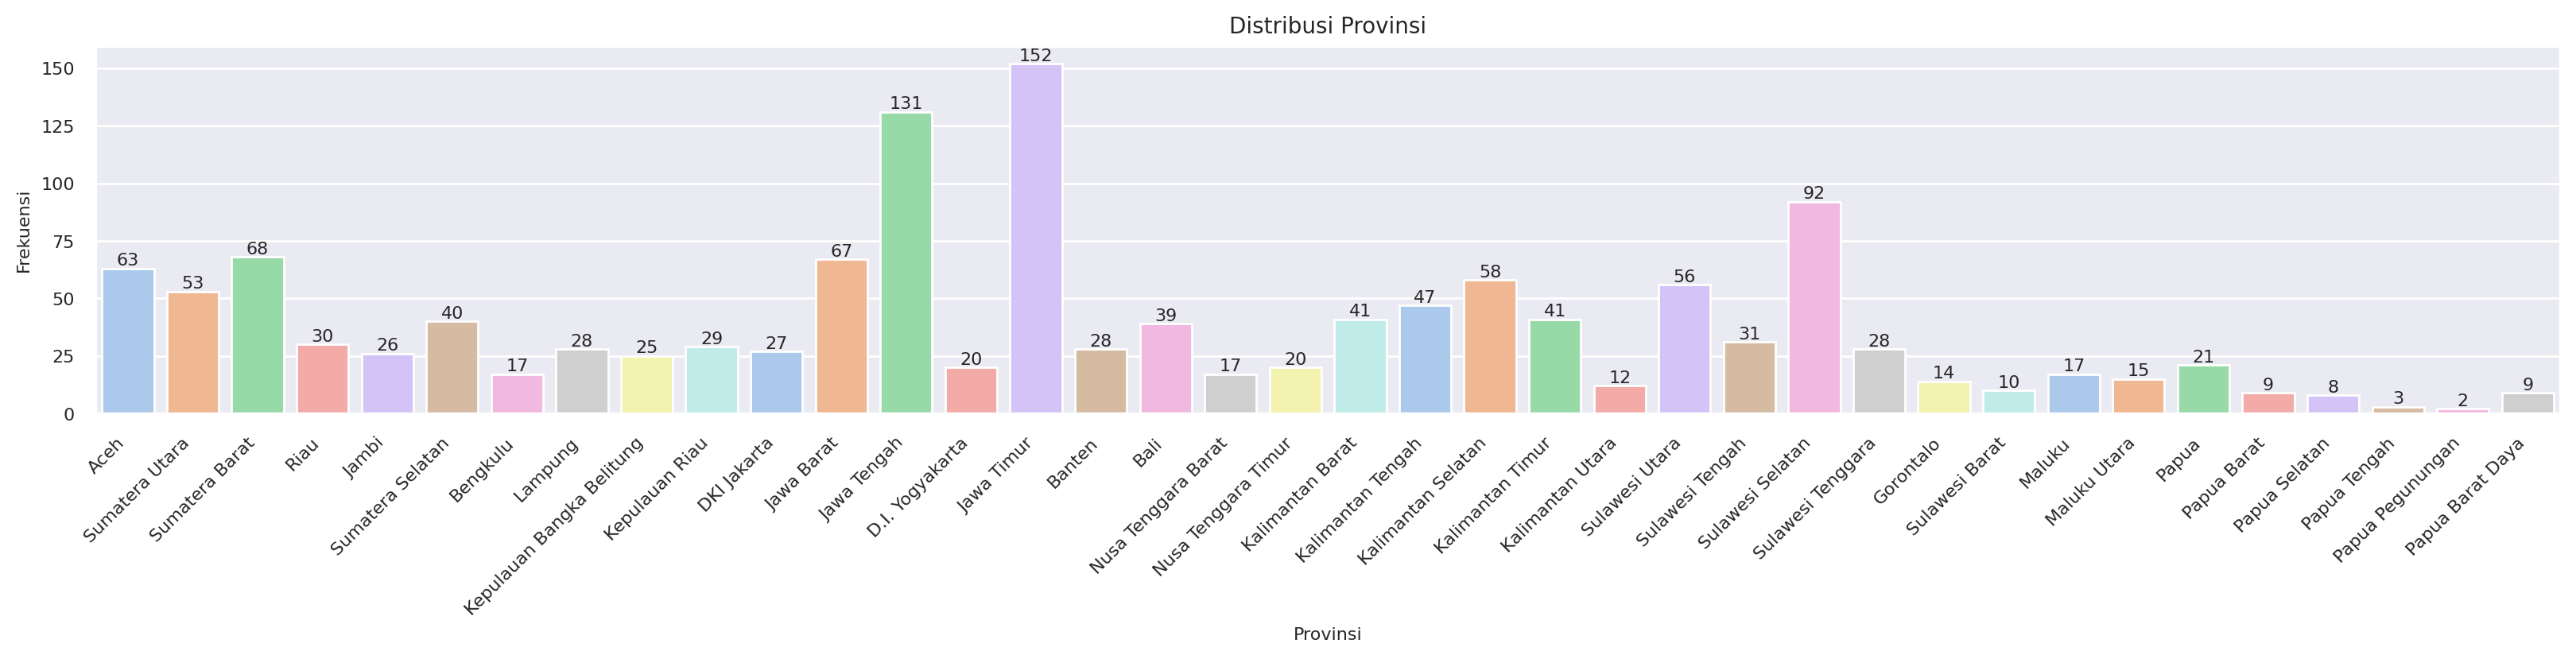

In [ ]:
#Visualisasi dengan Bar Plot untuk kategorikal
# Mengatur ukuran figure
plt.figure(figsize=(20, 3))

# Menghitung frekuensi untuk fitur 'Class'
sns.countplot(data=df, x='Provinsi', palette='pastel')

# Menambahkan judul dan label
plt.title('Distribusi Provinsi', fontsize=10)
plt.xlabel('Provinsi', fontsize=8)
plt.ylabel('Frekuensi', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=45, ha='right')


# Menambahkan angka di atas setiap bar
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)

plt.show()

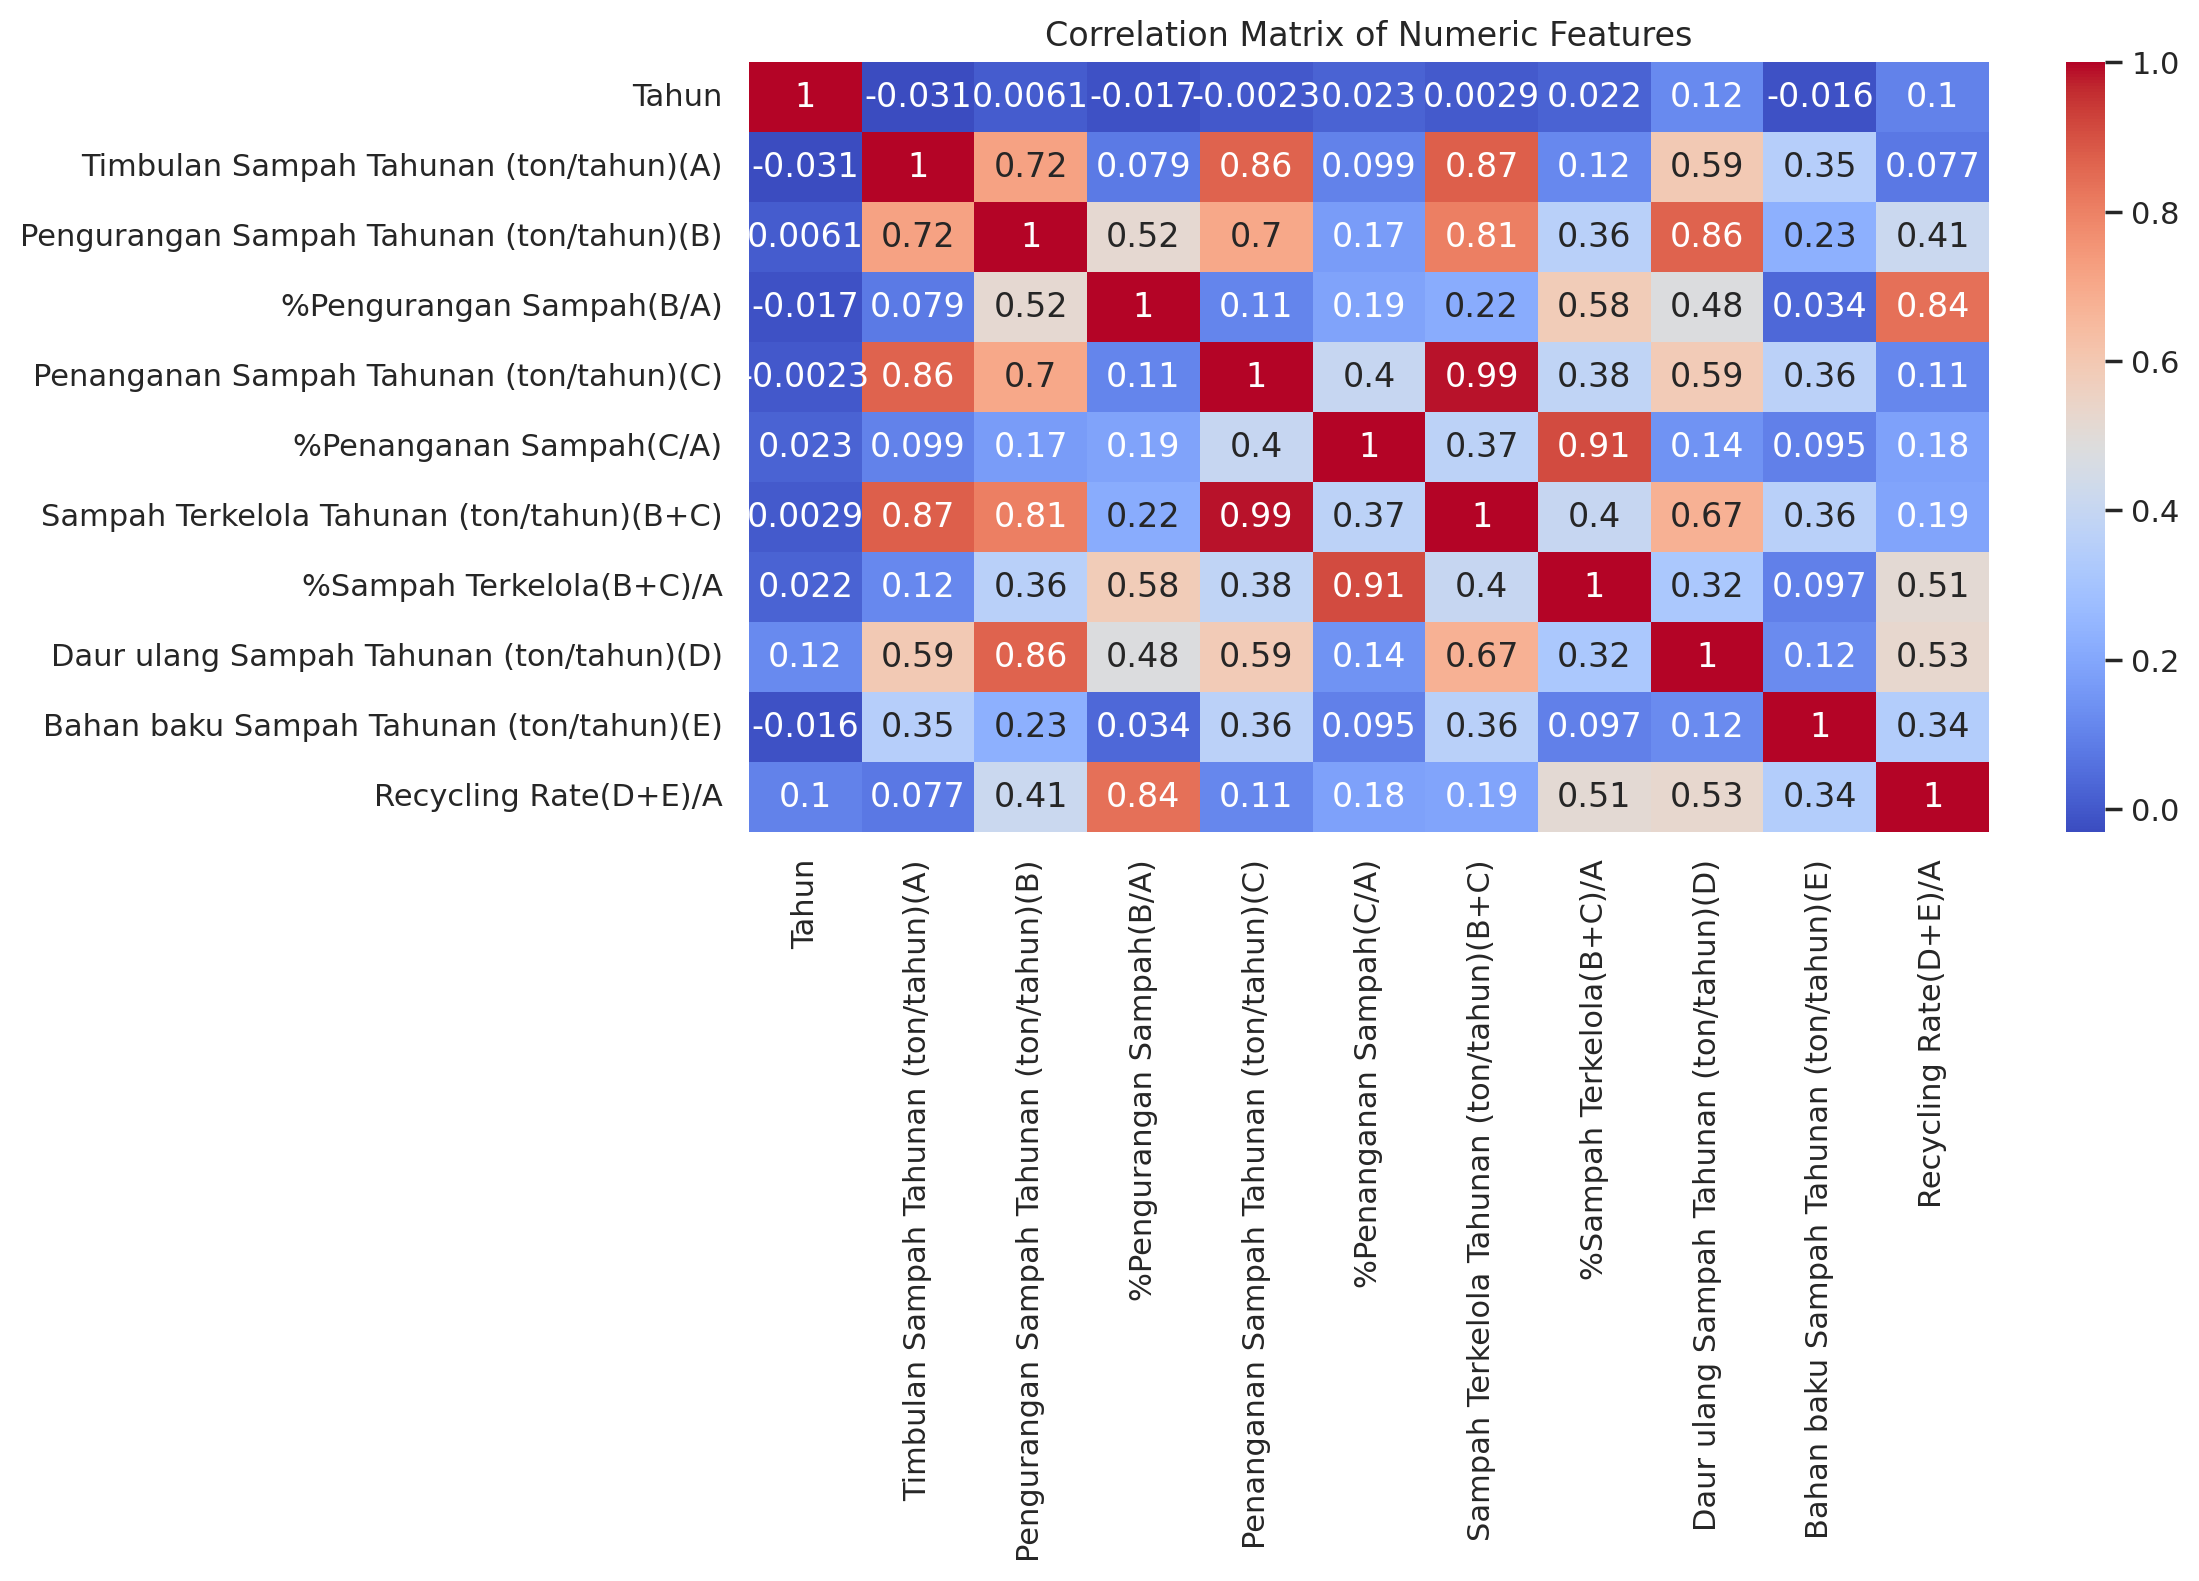

In [ ]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

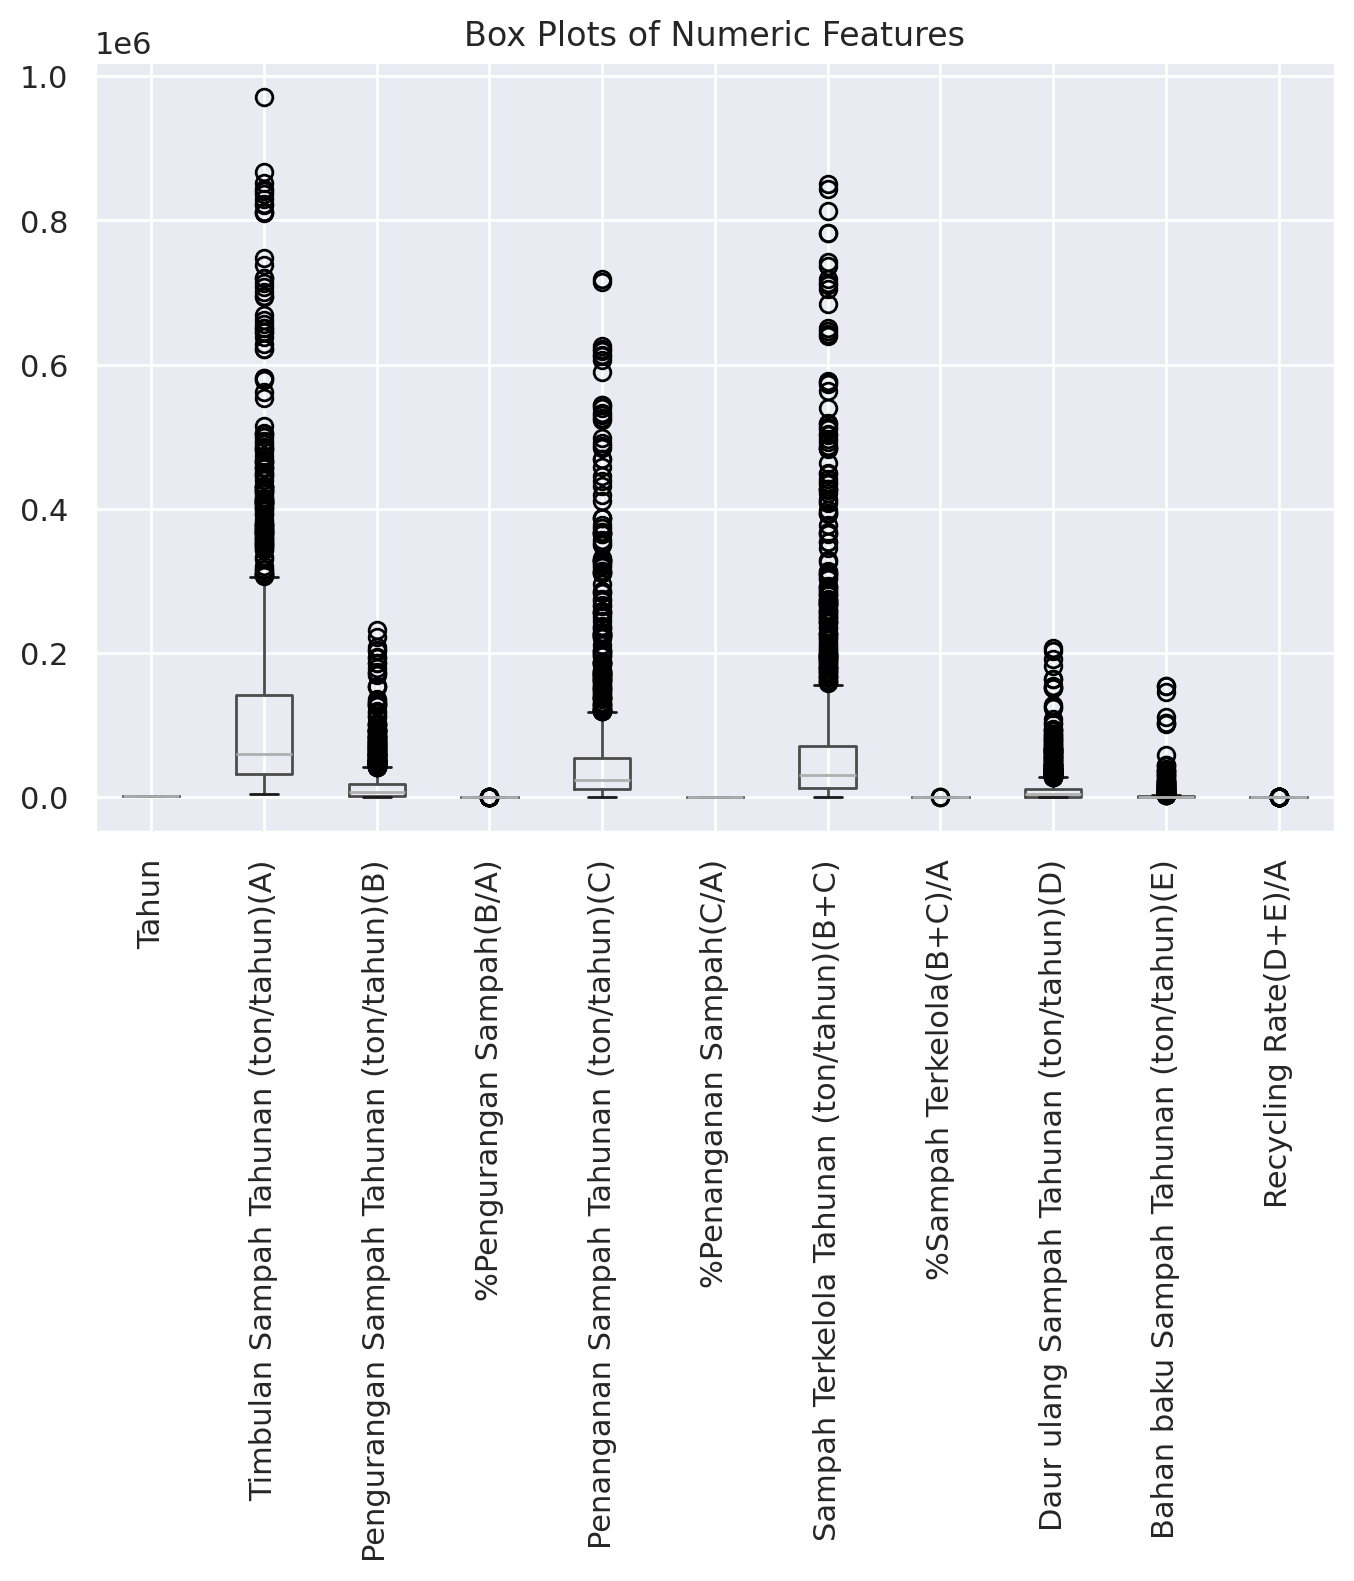

In [ ]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(8, 5))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

##**C. Memvalidasi Data**

###**1. Memeriksa Missing Value**

In [ ]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                                           Total    Percent
Tahun                                          0   0.000000
Provinsi                                       0   0.000000
Kabupaten/Kota                                 0   0.000000
Timbulan Sampah Tahunan (ton/tahun)(A)         0   0.000000
Pengurangan Sampah Tahunan (ton/tahun)(B)     38   2.725968
%Pengurangan Sampah(B/A)                      38   2.725968
Penanganan Sampah Tahunan (ton/tahun)(C)      16   1.147776
%Penanganan Sampah(C/A)                       16   1.147776
Sampah Terkelola Tahunan (ton/tahun)(B+C)      0   0.000000
%Sampah Terkelola(B+C)/A                       0   0.000000
Daur ulang Sampah Tahunan (ton/tahun)(D)     172  12.338594
Bahan baku Sampah Tahunan (ton/tahun)(E)     713  51.147776
Recycling Rate(D+E)/A                          0   0.000000
P1/P2                                          0   0.000000


###**2. Visualisasi Missing Value**

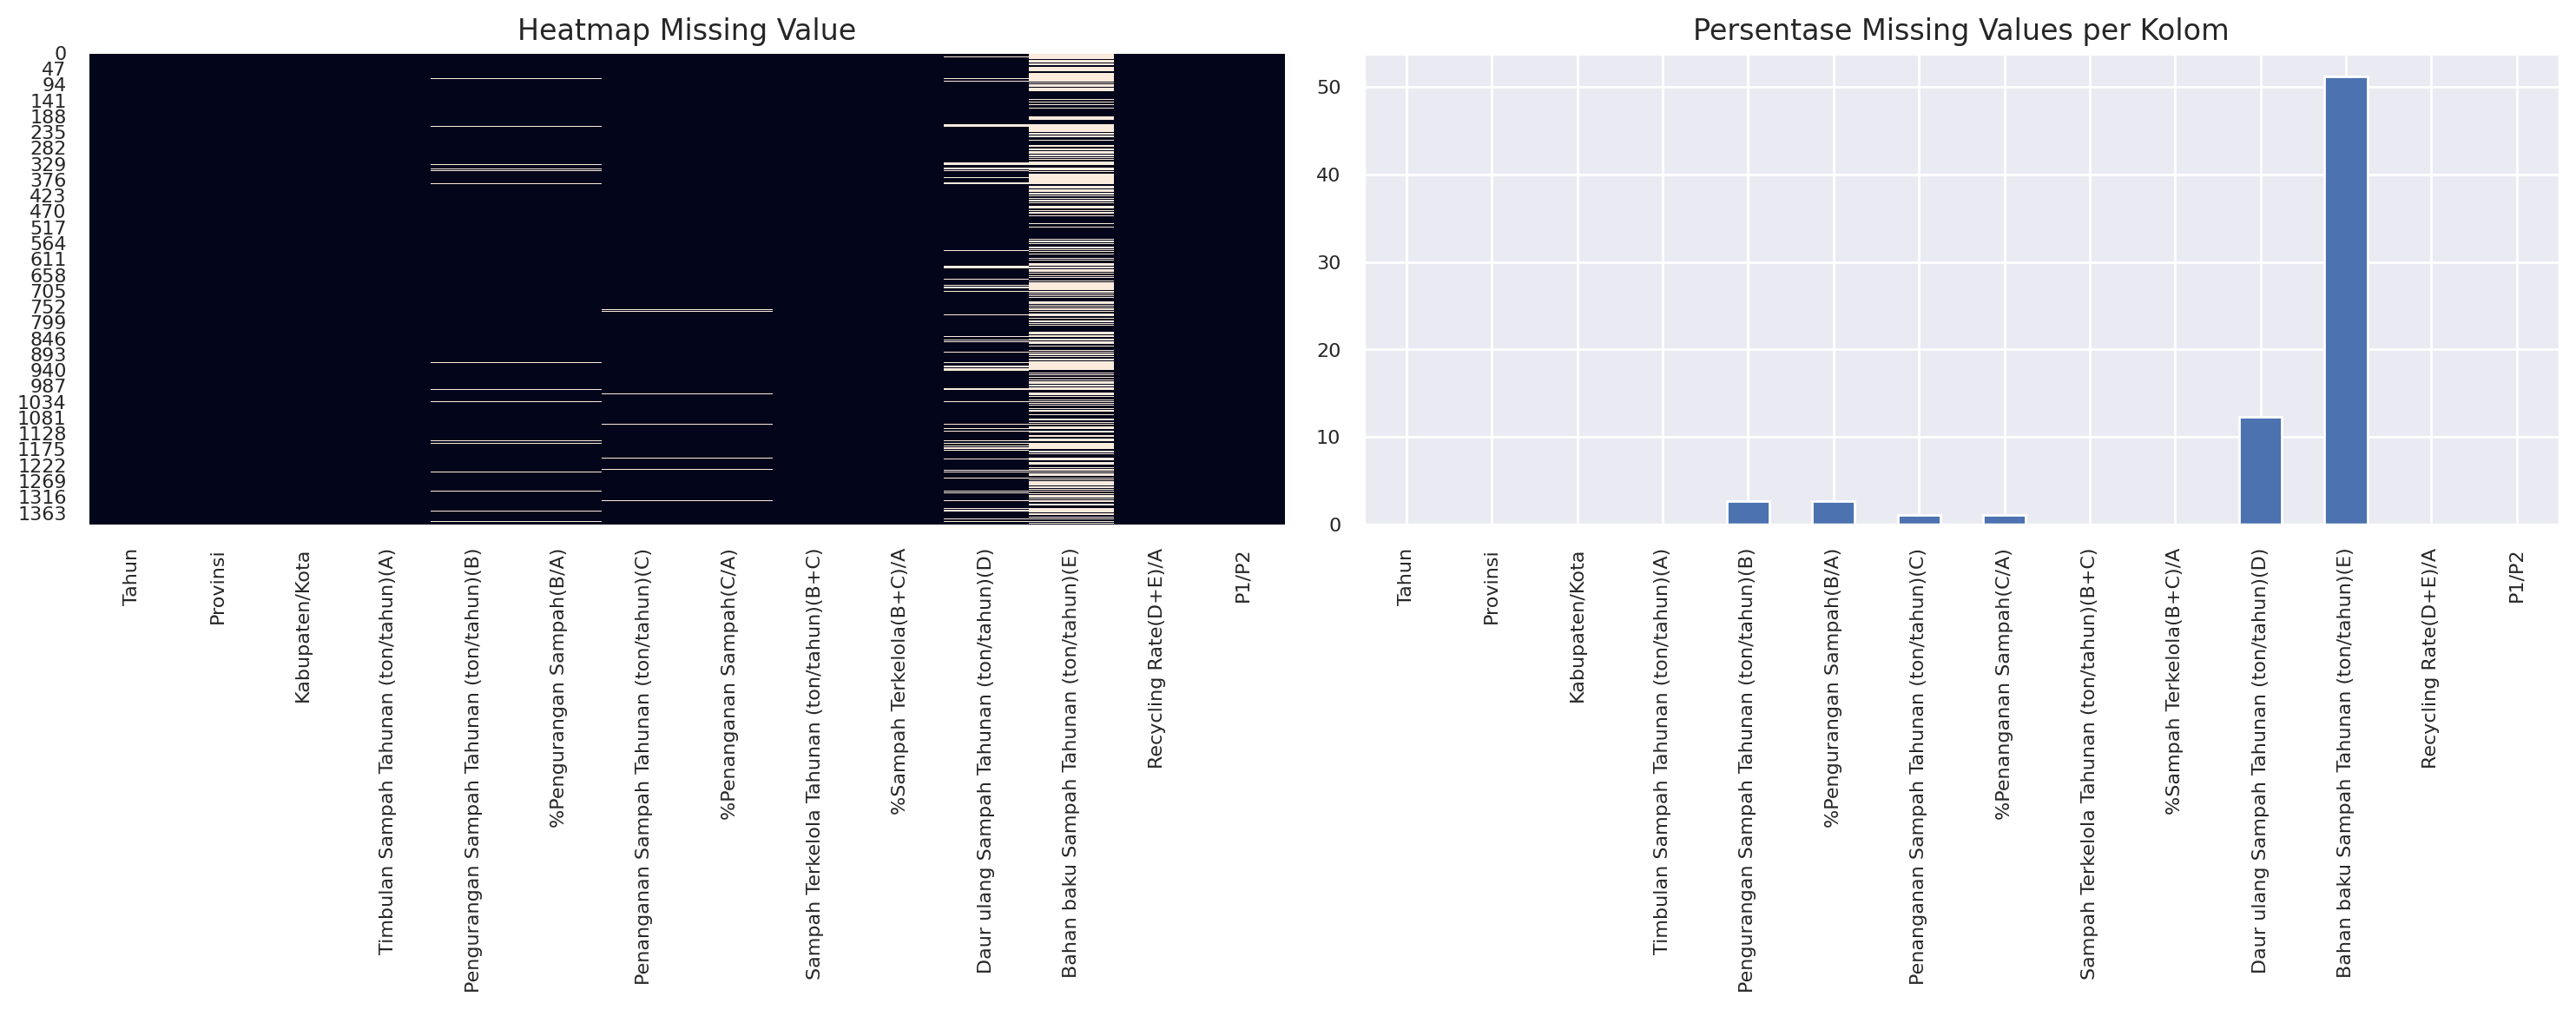

In [ ]:
# Membuat 1 baris dan 2 kolom untuk subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap visualization untuk missing value
sns.heatmap(df.isnull(), cbar=False, ax=axes[0])  # Menempatkan heatmap di subplot pertama
axes[0].set_title('Heatmap Missing Value')

# Histogram visualization missing values
missing_percentage.plot(kind='bar', ax=axes[1])  # Menempatkan histogram di subplot kedua
axes[1].set_title('Persentase Missing Values per Kolom')

# Mengubah ukuran font pada sumbu x dan y
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


***Penjelasan atau Deskripsi:***

Dari informasi tersebut, dapat dilakukan penanganan missing value terhadap kolom Bahan baku Sampah Tahunan (ton/tahun)(E) tersebut dengan menghapus keseluruhan kolom. Hal tersebut dilakukan karena kolom tersebut pun tidak memberikan informasi yang signifikan dan tidak memiliki korelasi positif dengan kolom (fitur) lainnya, yang berarti tidak relevan atau mungkin berkontribusi secara tidak langsung (dapat dilihat pada matriks korelasi (Correlation Matrix) sebelumnya).

###**3. Memeriksa Duplikat**

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


###**4. Validasi Data**

In [ ]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Tahun                                          int64
Provinsi                                      object
Kabupaten/Kota                                object
Timbulan Sampah Tahunan (ton/tahun)(A)       float64
Pengurangan Sampah Tahunan (ton/tahun)(B)    float64
%Pengurangan Sampah(B/A)                     float64
Penanganan Sampah Tahunan (ton/tahun)(C)     float64
%Penanganan Sampah(C/A)                      float64
Sampah Terkelola Tahunan (ton/tahun)(B+C)    float64
%Sampah Terkelola(B+C)/A                     float64
Daur ulang Sampah Tahunan (ton/tahun)(D)     float64
Bahan baku Sampah Tahunan (ton/tahun)(E)     float64
Recycling Rate(D+E)/A                        float64
P1/P2                                         object
dtype: object

Nilai non-numerik dalam kolom Pengurangan Sampah Tahunan (ton/tahun)(B):
[nan]

Nilai non-numerik dalam kolom %Pengurangan Sampah(B/A):
[nan]

Nilai non-numerik dalam kolom Penanganan Sampah Tahunan (ton/tahun)(C):
[nan]

Nilai non-numerik dal

###**5. Validasi Nilai Range**

In [ ]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Tahun:
Min: 2018, Max: 2023

Range nilai untuk Timbulan Sampah Tahunan (ton/tahun)(A):
Min: 4143.33, Max: 971101.08

Range nilai untuk Pengurangan Sampah Tahunan (ton/tahun)(B):
Min: 0.0, Max: 232200.21

Range nilai untuk %Pengurangan Sampah(B/A):
Min: 0.0, Max: 255.12

Range nilai untuk Penanganan Sampah Tahunan (ton/tahun)(C):
Min: 3.45, Max: 719003.65

Range nilai untuk %Penanganan Sampah(C/A):
Min: 0.01, Max: 98.95

Range nilai untuk Sampah Terkelola Tahunan (ton/tahun)(B+C):
Min: 0.0, Max: 850758.03

Range nilai untuk %Sampah Terkelola(B+C)/A:
Min: 0.0, Max: 322.63

Range nilai untuk Daur ulang Sampah Tahunan (ton/tahun)(D):
Min: 0.0, Max: 207464.22

Range nilai untuk Bahan baku Sampah Tahunan (ton/tahun)(E):
Min: 0.0, Max: 153947.78

Range nilai untuk Recycling Rate(D+E)/A:
Min: 0.0, Max: 251.68

Kategori unik dalam Provinsi:
['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi'
 'Sumatera Selatan' 'Bengkulu' 'Lampung' 'Kepulauan Bangka Belitung'
 'Kepulauan

##**D. Menentukan Object Data**

### **1. Identifikasi Objek Utama**

- target adalah P1/P2
- untuk saat ini, semua fitur, disertakan

##**E. Membersihkan Data**

###**1. Menangani Missing Values**

In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Tahun                                          0
Provinsi                                       0
Kabupaten/Kota                                 0
Timbulan Sampah Tahunan (ton/tahun)(A)         0
Pengurangan Sampah Tahunan (ton/tahun)(B)     38
%Pengurangan Sampah(B/A)                      38
Penanganan Sampah Tahunan (ton/tahun)(C)      16
%Penanganan Sampah(C/A)                       16
Sampah Terkelola Tahunan (ton/tahun)(B+C)      0
%Sampah Terkelola(B+C)/A                       0
Daur ulang Sampah Tahunan (ton/tahun)(D)     172
Bahan baku Sampah Tahunan (ton/tahun)(E)     713
Recycling Rate(D+E)/A                          0
P1/P2                                          0
dtype: int64


In [ ]:
#Menghapus kolom Bahan baku Sampah Tahunan (ton/tahun)(E)
df = df.drop(columns=['Bahan baku Sampah Tahunan (ton/tahun)(E)'])

***Penjelasan atau Deskripsi:***
Penghapusan kolom Bahan baku Sampah Tahunan (ton/tahun)(E) dilakukan karena kolom tersebut memiliki terlalu banyak missing value (dengan persentase 51%) serta kolom tersebut pun tidak memberikan informasi yang signifikan dan tidak memiliki korelasi positif dengan kolom (fitur) lainnya, yang berarti tidak relevan atau mungkin berkontribusi secara tidak langsung

In [ ]:
# Daftar kolom dengan missing value yang akan diimputasi
cols_to_impute = ['Pengurangan Sampah Tahunan (ton/tahun)(B)',
                  '%Pengurangan Sampah(B/A)',
                  'Penanganan Sampah Tahunan (ton/tahun)(C)',
                  'Daur ulang Sampah Tahunan (ton/tahun)(D)']

# Imputasi menggunakan rata-rata per Kabupaten/Kota
for col in cols_to_impute:
    df[col] = df.groupby('Kabupaten/Kota')[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Memeriksa nilai NaN yang tersisa
print("Missing values setelah proses pembersihan:")
print(df.isnull().sum())

Missing values setelah proses pembersihan:
Tahun                                         0
Provinsi                                      0
Kabupaten/Kota                                0
Timbulan Sampah Tahunan (ton/tahun)(A)        0
Pengurangan Sampah Tahunan (ton/tahun)(B)    13
%Pengurangan Sampah(B/A)                     13
Penanganan Sampah Tahunan (ton/tahun)(C)      3
%Penanganan Sampah(C/A)                      16
Sampah Terkelola Tahunan (ton/tahun)(B+C)     0
%Sampah Terkelola(B+C)/A                      0
Daur ulang Sampah Tahunan (ton/tahun)(D)     84
Recycling Rate(D+E)/A                         0
P1/P2                                         0
dtype: int64


***Penjelasan atau Deskripsi:***

Setelah dilakukan penanganan missing value dengan imputasi menggunakan rata-rata (mean) berdasarkan Kabupaten/Kota, terlihat bahwa masih ada missing value. Hal tersebut kemungkinan terdapat Kabupaten/ Kota yang ternyata pada kolom tersebut hanya diisikan oleh missing value. Sehingga perlu dilakukan pengecekan Grup dengan semua missing di kolom, yang kemudian dilakukan imputasi median global digunakan sebagai pendekatan universal untuk memberikan nilai imputasi tidak bias terhadap grup tertentu dan tetap representatif untuk dataset secara keseluruhan.

In [ ]:
for col in cols_to_impute:
    missing_groups = df.groupby('Kabupaten/Kota')[col].apply(lambda x: x.isnull().all())
    print(f"\nGrup dengan semua missing di kolom {col}:")
    print(missing_groups[missing_groups])


Grup dengan semua missing di kolom Pengurangan Sampah Tahunan (ton/tahun)(B):
Kabupaten/Kota
Kab. Belu                 True
Kab. Buru                 True
Kab. Buton Tengah         True
Kab. Halmahera Selatan    True
Kab. Kepulauan Aru        True
Kab. Konawe               True
Kab. Lembata              True
Kab. Mandailing Natal     True
Kab. Pesisir Barat        True
Kab. Pulau Taliabu        True
Kab. Rote Ndao            True
Kab. Subang               True
Name: Pengurangan Sampah Tahunan (ton/tahun)(B), dtype: bool

Grup dengan semua missing di kolom %Pengurangan Sampah(B/A):
Kabupaten/Kota
Kab. Belu                 True
Kab. Buru                 True
Kab. Buton Tengah         True
Kab. Halmahera Selatan    True
Kab. Kepulauan Aru        True
Kab. Konawe               True
Kab. Lembata              True
Kab. Mandailing Natal     True
Kab. Pesisir Barat        True
Kab. Pulau Taliabu        True
Kab. Rote Ndao            True
Kab. Subang               True
Name: %Pengurangan Sampa

In [ ]:
for col in cols_to_impute:
    df[col] = df.groupby('Kabupaten/Kota')[col].transform(lambda x: x.fillna(x.mean()))
    # Fallback untuk grup tanpa data
    df[col] = df[col].fillna(df[col].median())  # Gunakan median global

In [ ]:
# Memeriksa nilai NaN yang tersisa
print("Missing values setelah proses penanganan missing value tahap 2:")
print(df.isnull().sum())

Missing values setelah proses penanganan missing value tahap 2:
Tahun                                         0
Provinsi                                      0
Kabupaten/Kota                                0
Timbulan Sampah Tahunan (ton/tahun)(A)        0
Pengurangan Sampah Tahunan (ton/tahun)(B)     0
%Pengurangan Sampah(B/A)                      0
Penanganan Sampah Tahunan (ton/tahun)(C)      0
%Penanganan Sampah(C/A)                      16
Sampah Terkelola Tahunan (ton/tahun)(B+C)     0
%Sampah Terkelola(B+C)/A                      0
Daur ulang Sampah Tahunan (ton/tahun)(D)      0
Recycling Rate(D+E)/A                         0
P1/P2                                         0
dtype: int64


In [ ]:
#penanganan missing value dengan perhitungan manual
df['%Penanganan Sampah(C/A)'] = df['%Penanganan Sampah(C/A)'].fillna(
    (df['Penanganan Sampah Tahunan (ton/tahun)(C)'] / df['Timbulan Sampah Tahunan (ton/tahun)(A)']) * 100)

***Penjelasan atau Deskripsi:***

Setelah dilakukan penanganan missing value lanjutan, ternyata kolom '%Penanganan Sampah (C/A)' masih terdapat missing value. Namun untuk kolom ini dilakukan penanganan dengan perhitungan manual, yakni missing value yang ada pada kolom tersebut diisikan dengan nilai yang ada pada kolom 'Penanganan Sampah Tahunan (ton/tahun)(C)'/'Timbulan Sampah Tahunan (ton/tahun)(A)'

Missing values final:
Tahun                                        0
Provinsi                                     0
Kabupaten/Kota                               0
Timbulan Sampah Tahunan (ton/tahun)(A)       0
Pengurangan Sampah Tahunan (ton/tahun)(B)    0
%Pengurangan Sampah(B/A)                     0
Penanganan Sampah Tahunan (ton/tahun)(C)     0
%Penanganan Sampah(C/A)                      0
Sampah Terkelola Tahunan (ton/tahun)(B+C)    0
%Sampah Terkelola(B+C)/A                     0
Daur ulang Sampah Tahunan (ton/tahun)(D)     0
Recycling Rate(D+E)/A                        0
P1/P2                                        0
dtype: int64


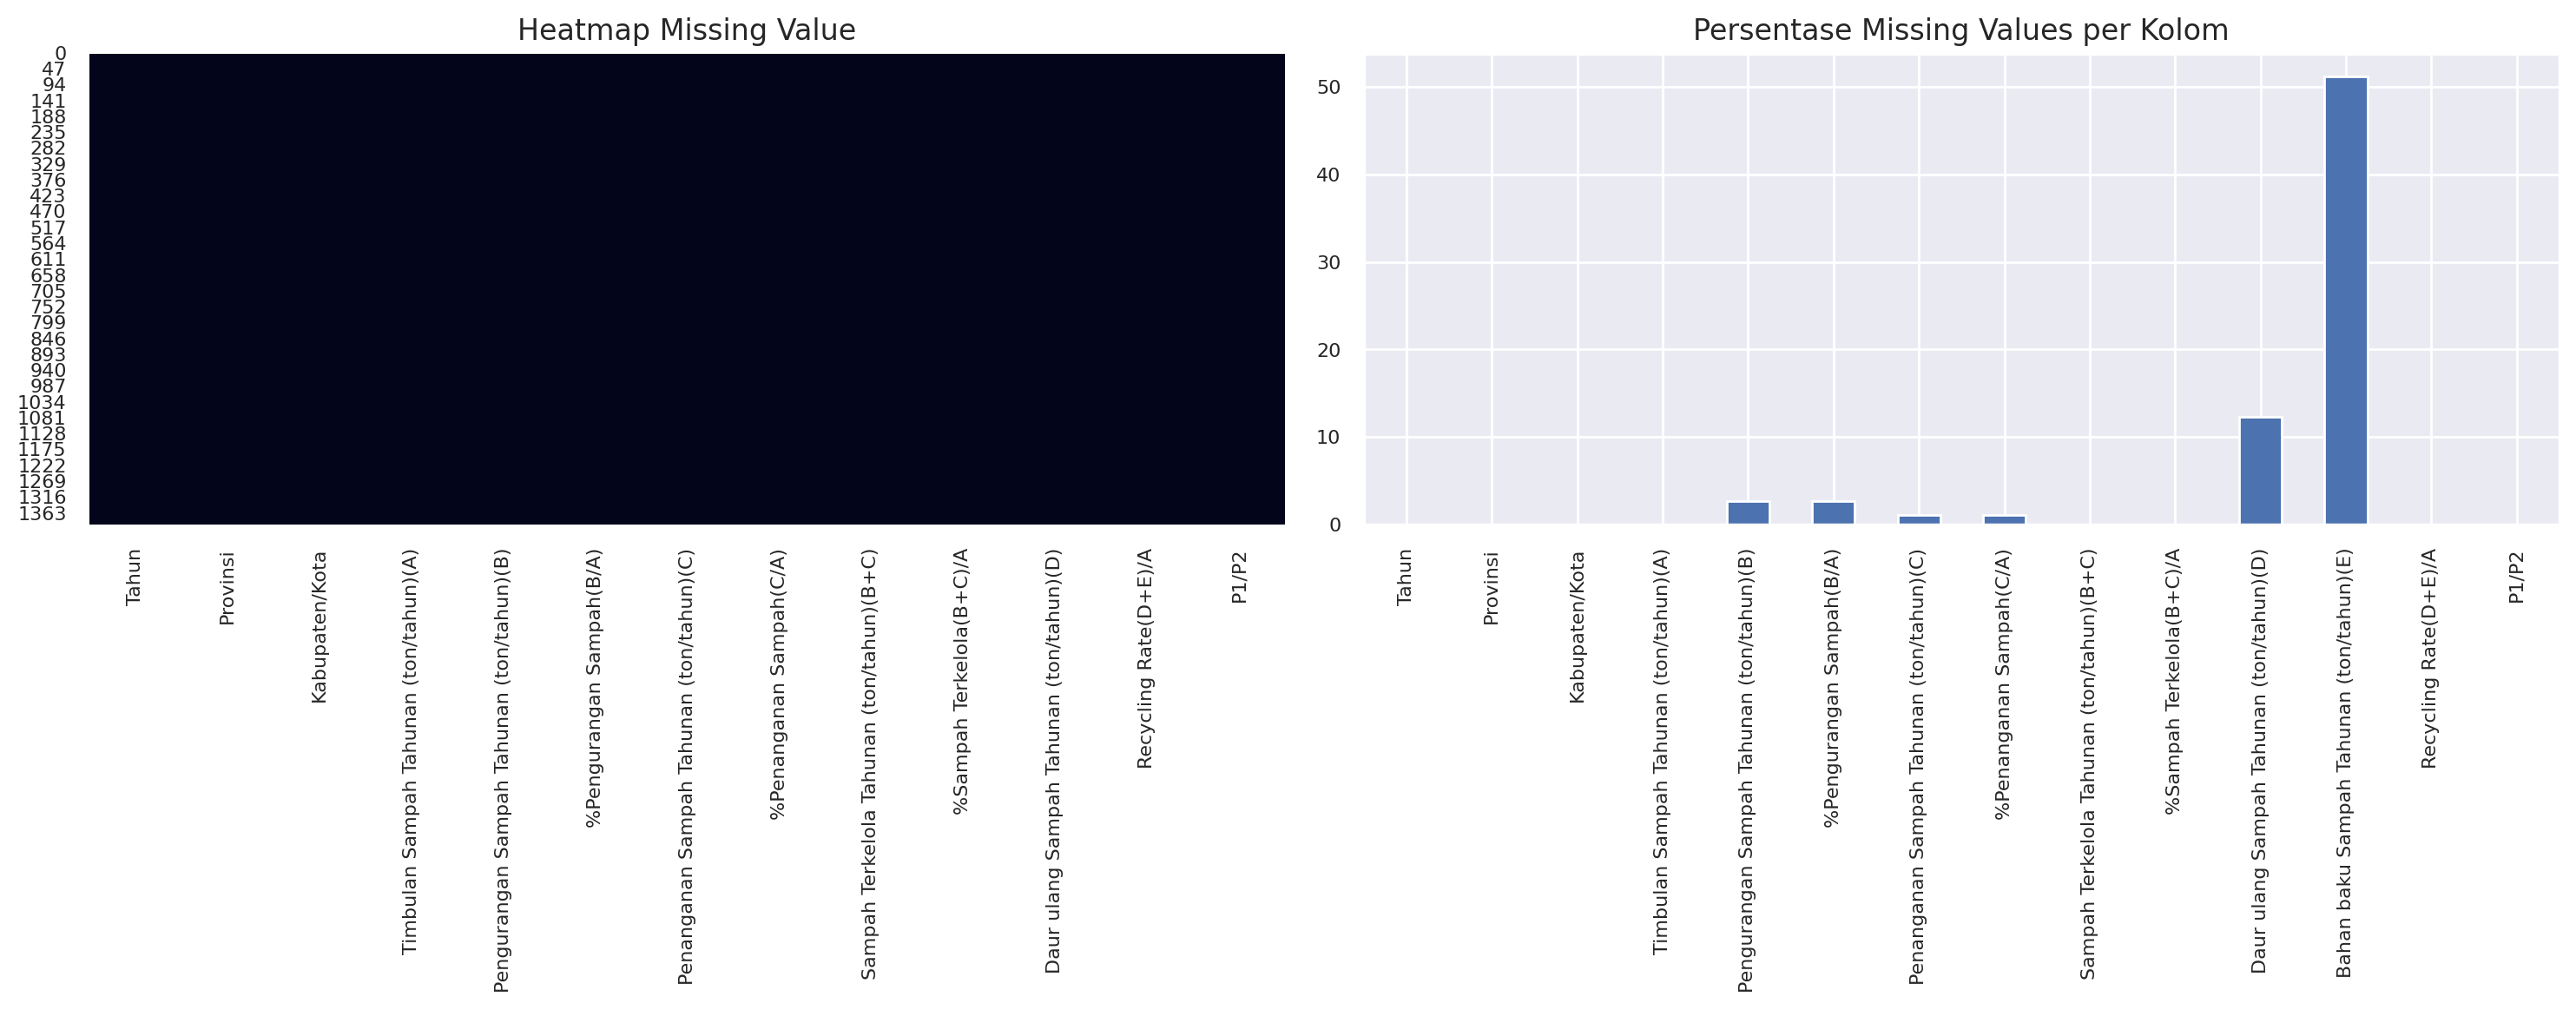

In [ ]:
#Memeriksa kembali nilai NaN/ Missing value
print("Missing values final:")
print(df.isnull().sum())

# Membuat 1 baris dan 2 kolom untuk subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap visualization untuk missing value
sns.heatmap(df.isnull(), cbar=False, ax=axes[0])  # Menempatkan heatmap di subplot pertama
axes[0].set_title('Heatmap Missing Value')

# Histogram visualization missing values
missing_percentage.plot(kind='bar', ax=axes[1])  # Menempatkan histogram di subplot kedua
axes[1].set_title('Persentase Missing Values per Kolom')

# Mengubah ukuran font pada sumbu x dan y
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


###**2. Validasi Hasil Pembersihan**

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tahun                                      1394 non-null   int64  
 1   Provinsi                                   1394 non-null   object 
 2   Kabupaten/Kota                             1394 non-null   object 
 3   Timbulan Sampah Tahunan (ton/tahun)(A)     1394 non-null   float64
 4   Pengurangan Sampah Tahunan (ton/tahun)(B)  1394 non-null   float64
 5   %Pengurangan Sampah(B/A)                   1394 non-null   float64
 6   Penanganan Sampah Tahunan (ton/tahun)(C)   1394 non-null   float64
 7   %Penanganan Sampah(C/A)                    1394 non-null   float64
 8   Sampah Terkelola Tahunan (ton/tahun)(B+C)  1394 non-null   float64
 9   %Sampah Terkelola(B+C)/A                   1394 non-null   float64
 10  Daur ulang Sampah Tahuna

Tahun Provinsi      Kabupaten/Kota  Timbulan Sampah Tahunan (ton/tahun)(A)  \
0   2023     Aceh   Kab. Aceh Selatan                                35323.53   
1   2023     Aceh  Kab. Aceh Tenggara                                41666.21   
2   2023     Aceh     Kab. Aceh Timur                                65670.22   
3   2023     Aceh    Kab. Aceh Tengah                                40050.24   
4   2023     Aceh     Kab. Aceh Barat                                36813.72   

   Pengurangan Sampah Tahunan (ton/tahun)(B)  %Pengurangan Sampah(B/A)  \
0                                     113.25                      0.32   
1                                      25.55                      0.06   
2                                    1044.80                      1.59   
3                                    1093.18                      2.73   
4                                    3322.76                      9.03   

   Penanganan Sampah Tahunan (ton/tahun)(C)  %Penanganan Sampah(C/A)  \
0                                  12775.00                    36.17   
1                                   7227.00                    17.34   
2                                  22747.55                    34.64   
3                                  22630.00                    56.50   
4                                  30502.76                    82.86   

   Sampah Terkelola Tahunan (ton/tahun)(B+C)  %Sampah Terkelola(B+C)/A  \
0                                   12888.25                     36.49   
1                                    7252.55                     17.41   
2                                   23792.35                     36.23   
3                                   23723.18                     59.23   
4                                   33825.52                     91.88   

   Daur ulang Sampah Tahunan (ton/tahun)(D)  Recycling Rate(D+E)/A P1/P2  
0                                    67.890                   0.19   P 2  
1                                  3245.525                   0.00   P 2  
2                                   857.750                   1.31   P 2  
3                                  1093.180                   2.73   P 2  
4                                  1423.500                   3.87   P 2

**Insight**: Setelah dilakukan preprocessing untuk memperbaiki data (menyamakan tipe data dan menangani missing value) **Data terdiri dari 1394 records dan 13 fitur**.

In [ ]:
#Memeriksa jumlah baris unik disetiap kolom

df.nunique().sort_values()

P1/P2                                           1
Tahun                                           6
Provinsi                                       38
Kabupaten/Kota                                438
Recycling Rate(D+E)/A                         888
%Pengurangan Sampah(B/A)                     1015
Daur ulang Sampah Tahunan (ton/tahun)(D)     1194
Penanganan Sampah Tahunan (ton/tahun)(C)     1240
%Penanganan Sampah(C/A)                      1275
%Sampah Terkelola(B+C)/A                     1283
Pengurangan Sampah Tahunan (ton/tahun)(B)    1289
Timbulan Sampah Tahunan (ton/tahun)(A)       1359
Sampah Terkelola Tahunan (ton/tahun)(B+C)    1375
dtype: int64

In [ ]:
#memeriksa jumlah baris unik disetiap kolom

nu = df.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; # fitur numerical & categorical

for i in range(df.shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m Datset memiliki {} fitur numerik & {} fitur kategorikal.'.format(len(nf),len(cf)))


Inference: Datset memiliki 10 fitur numerik & 3 fitur kategorikal.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

Tahun  Timbulan Sampah Tahunan (ton/tahun)(A)  \
count  1394.000000                             1394.000000   
mean   2021.260402                           115700.629613   
std       1.434493                           143519.831960   
min    2018.000000                             4143.330000   
25%    2020.000000                            31621.555000   
50%    2021.000000                            59434.540000   
75%    2023.000000                           141517.402500   
max    2023.000000                           971101.080000   

       Pengurangan Sampah Tahunan (ton/tahun)(B)  %Pengurangan Sampah(B/A)  \
count                                1394.000000               1394.000000   
mean                                16025.927339                 12.504815   
std                                 27959.341224                 12.910353   
min                                     0.000000                  0.000000   
25%                                  1465.912500                  3.150000   
50%                                  6100.370000                 11.300000   
75%                                 17180.195000                 19.420000   
max                                232200.210000                255.120000   

       Penanganan Sampah Tahunan (ton/tahun)(C)  %Penanganan Sampah(C/A)  \
count                               1394.000000              1394.000000   
mean                               55031.301417                44.424721   
std                                94871.959732                25.191410   
min                                    3.450000                 0.010000   
25%                                10535.492500                22.025000   
50%                                23308.650000                41.530000   
75%                                53190.130000                70.255000   
max                               719003.650000                98.950000   

       Sampah Terkelola Tahunan (ton/tahun)(B+C)  %Sampah Terkelola(B+C)/A  \
count                                1394.000000               1394.000000   
mean                                70355.855215                 56.331829   
std                                115460.468005                 30.874570   
min                                     0.000000                  0.000000   
25%                                 12826.560000                 30.382500   
50%                                 30442.540000                 56.045000   
75%                                 70259.637500                 82.077500   
max                                850758.030000                322.630000   

       Daur ulang Sampah Tahunan (ton/tahun)(D)  Recycling Rate(D+E)/A  
count                               1394.000000            1394.000000  
mean                               10576.592263               9.075782  
std                                21424.756179              12.675455  
min                                    0.000000               0.000000  
25%                                  660.380000               0.440000  
50%                                 3245.525000               5.090000  
75%                                10228.635000              14.815000  
max                               207464.220000             251.680000

*   Count (Jumlah total baris data yang valid (tidak kosong) untuk setiap kolom): Semua kolom memiliki 1394 data valid
*   Mean (rata-rata nilai yang ada disetiap kolom)
*   std (standar deviasi, sejauh mana data tersebar dari rata-rata)
*   min (nilai terkecil yang ada disetiap kolom)
*   25% (kuartil pertama, 25% data lebih kecil dari nilai ini)
*   50% (Kuartil kedua, atau median, yaitu 50% data berada di bawah nilai ini)
*   75% (Kuartil ketiga, 75% data lebih kecil dari nilai ini)
*   max (nilai terbesar yang ada disetiap kolom)



In [ ]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/Cleaned_Data_Capaian_SIPSN_KLHK.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'Cleaned_Data_Capaian_SIPSN_KLHK.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'Cleaned_Data_Capaian_SIPSN_KLHK.csv'


##**F. Membangun Model**

###**1. K-Means**

Tujuan: mengelompokkan kabupaten/kota berdasarkan kinerja pengelolaan sampah. dengan menggunakan fitur-fitur yang mencakup volume sampah yang dihasilkan, pengurangan sampah, penanganan sampah, sampah yang terkelola, serta tingkat daur ulang,  dapat teridentifikasi pola-pola dalam pengelolaan sampah di berbagai daerah dan menentukan kelompok daerah yang memiliki kinerja serupa dalam hal pengelolaan dan daur ulang sampah.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
features = ['Timbulan Sampah Tahunan (ton/tahun)(A)',
            'Pengurangan Sampah Tahunan (ton/tahun)(B)',
            '%Pengurangan Sampah(B/A)',
            'Penanganan Sampah Tahunan (ton/tahun)(C)',
            '%Penanganan Sampah(C/A)',
            'Sampah Terkelola Tahunan (ton/tahun)(B+C)',
            '%Sampah Terkelola(B+C)/A',
            'Daur ulang Sampah Tahunan (ton/tahun)(D)',
            'Recycling Rate(D+E)/A']
data = df[features]

In [ ]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

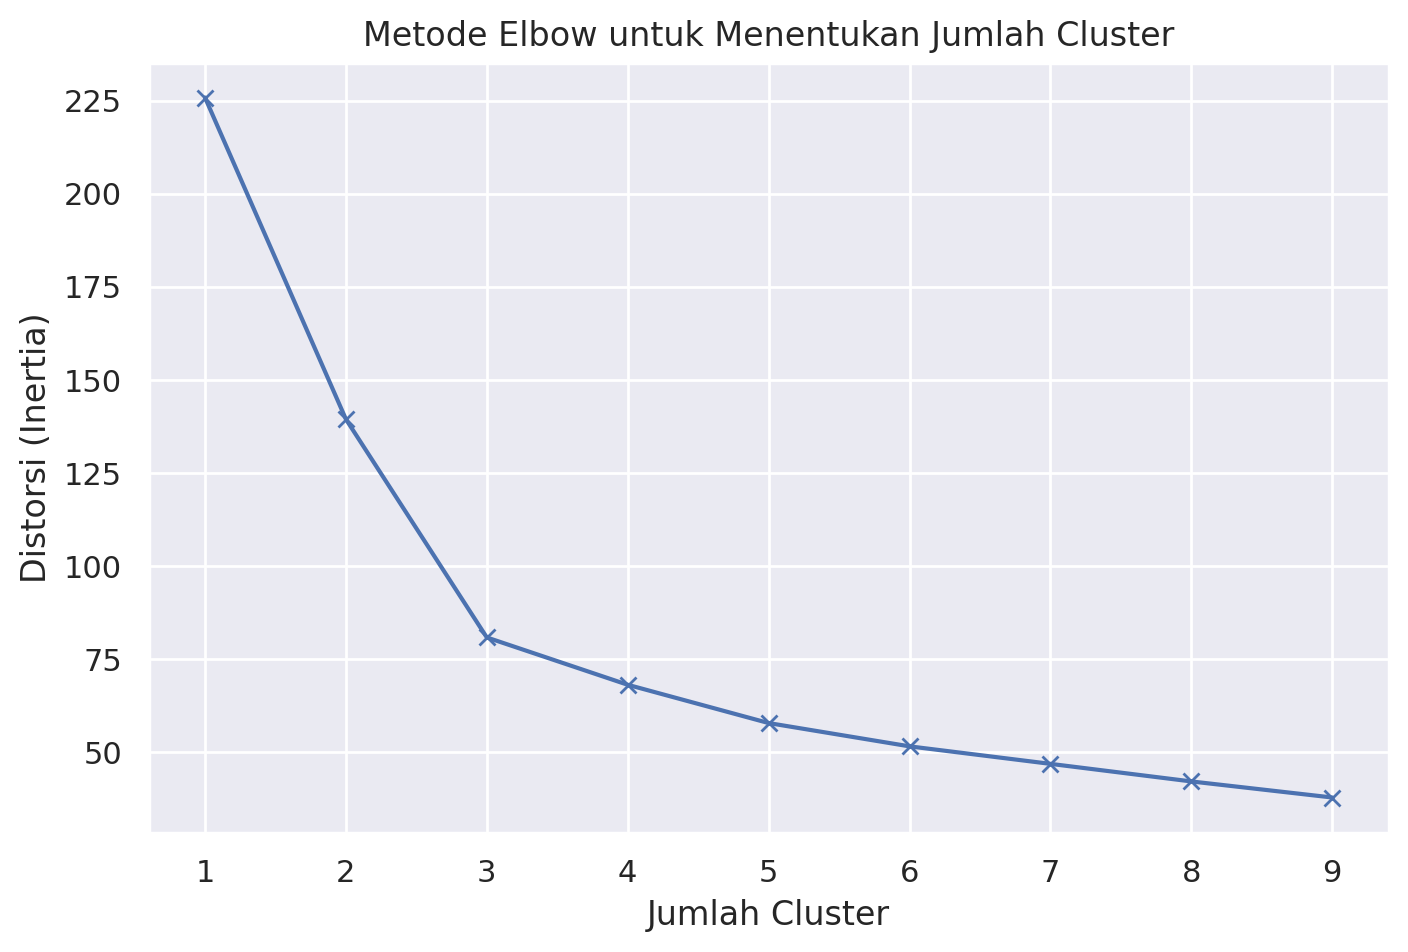

In [ ]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Distorsi (Inertia)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

***Penjelasan atau Deskripsi:***

Grafik elbow menunjukkan hubungan antara jumlah cluster dan nilai inertia (distorsi). Jumlah cluster optimal adalah titik sebelum grafik mulai mendatar.

In [ ]:
from sklearn.metrics import silhouette_score
# Evaluasi Silhouette Score untuk 2 hingga 10 cluster
for k in range(2, 11):  # Silhouette Score hanya berlaku untuk k > 1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {silhouette_avg:.2f}")

Jumlah Cluster: 2, Silhouette Score: 0.44
Jumlah Cluster: 3, Silhouette Score: 0.48
Jumlah Cluster: 4, Silhouette Score: 0.48
Jumlah Cluster: 5, Silhouette Score: 0.37
Jumlah Cluster: 6, Silhouette Score: 0.38
Jumlah Cluster: 7, Silhouette Score: 0.39
Jumlah Cluster: 8, Silhouette Score: 0.32
Jumlah Cluster: 9, Silhouette Score: 0.32
Jumlah Cluster: 10, Silhouette Score: 0.27


***Penjelasan atau Deskripsi:***

* Skor Silhouette Tertinggi: Nilai tertinggi (0.48) ditemukan pada jumlah cluster 3 dan 4. Ini menunjukkan bahwa jumlah cluster 3 atau 4 memberikan pembagian yang relatif baik di dalam cluster.
* Menurunnya Skor setelah Cluster 4: Setelah jumlah cluster 4, skor silhouette mulai menurun (contoh: 0.37 untuk 5 cluster), yang menunjukkan bahwa menambah jumlah cluster lebih banyak mungkin tidak meningkatkan kualitas clustering. Cluster yang lebih banyak mungkin mengarah pada pembagian yang kurang optimal.

In [ ]:
# K=3
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

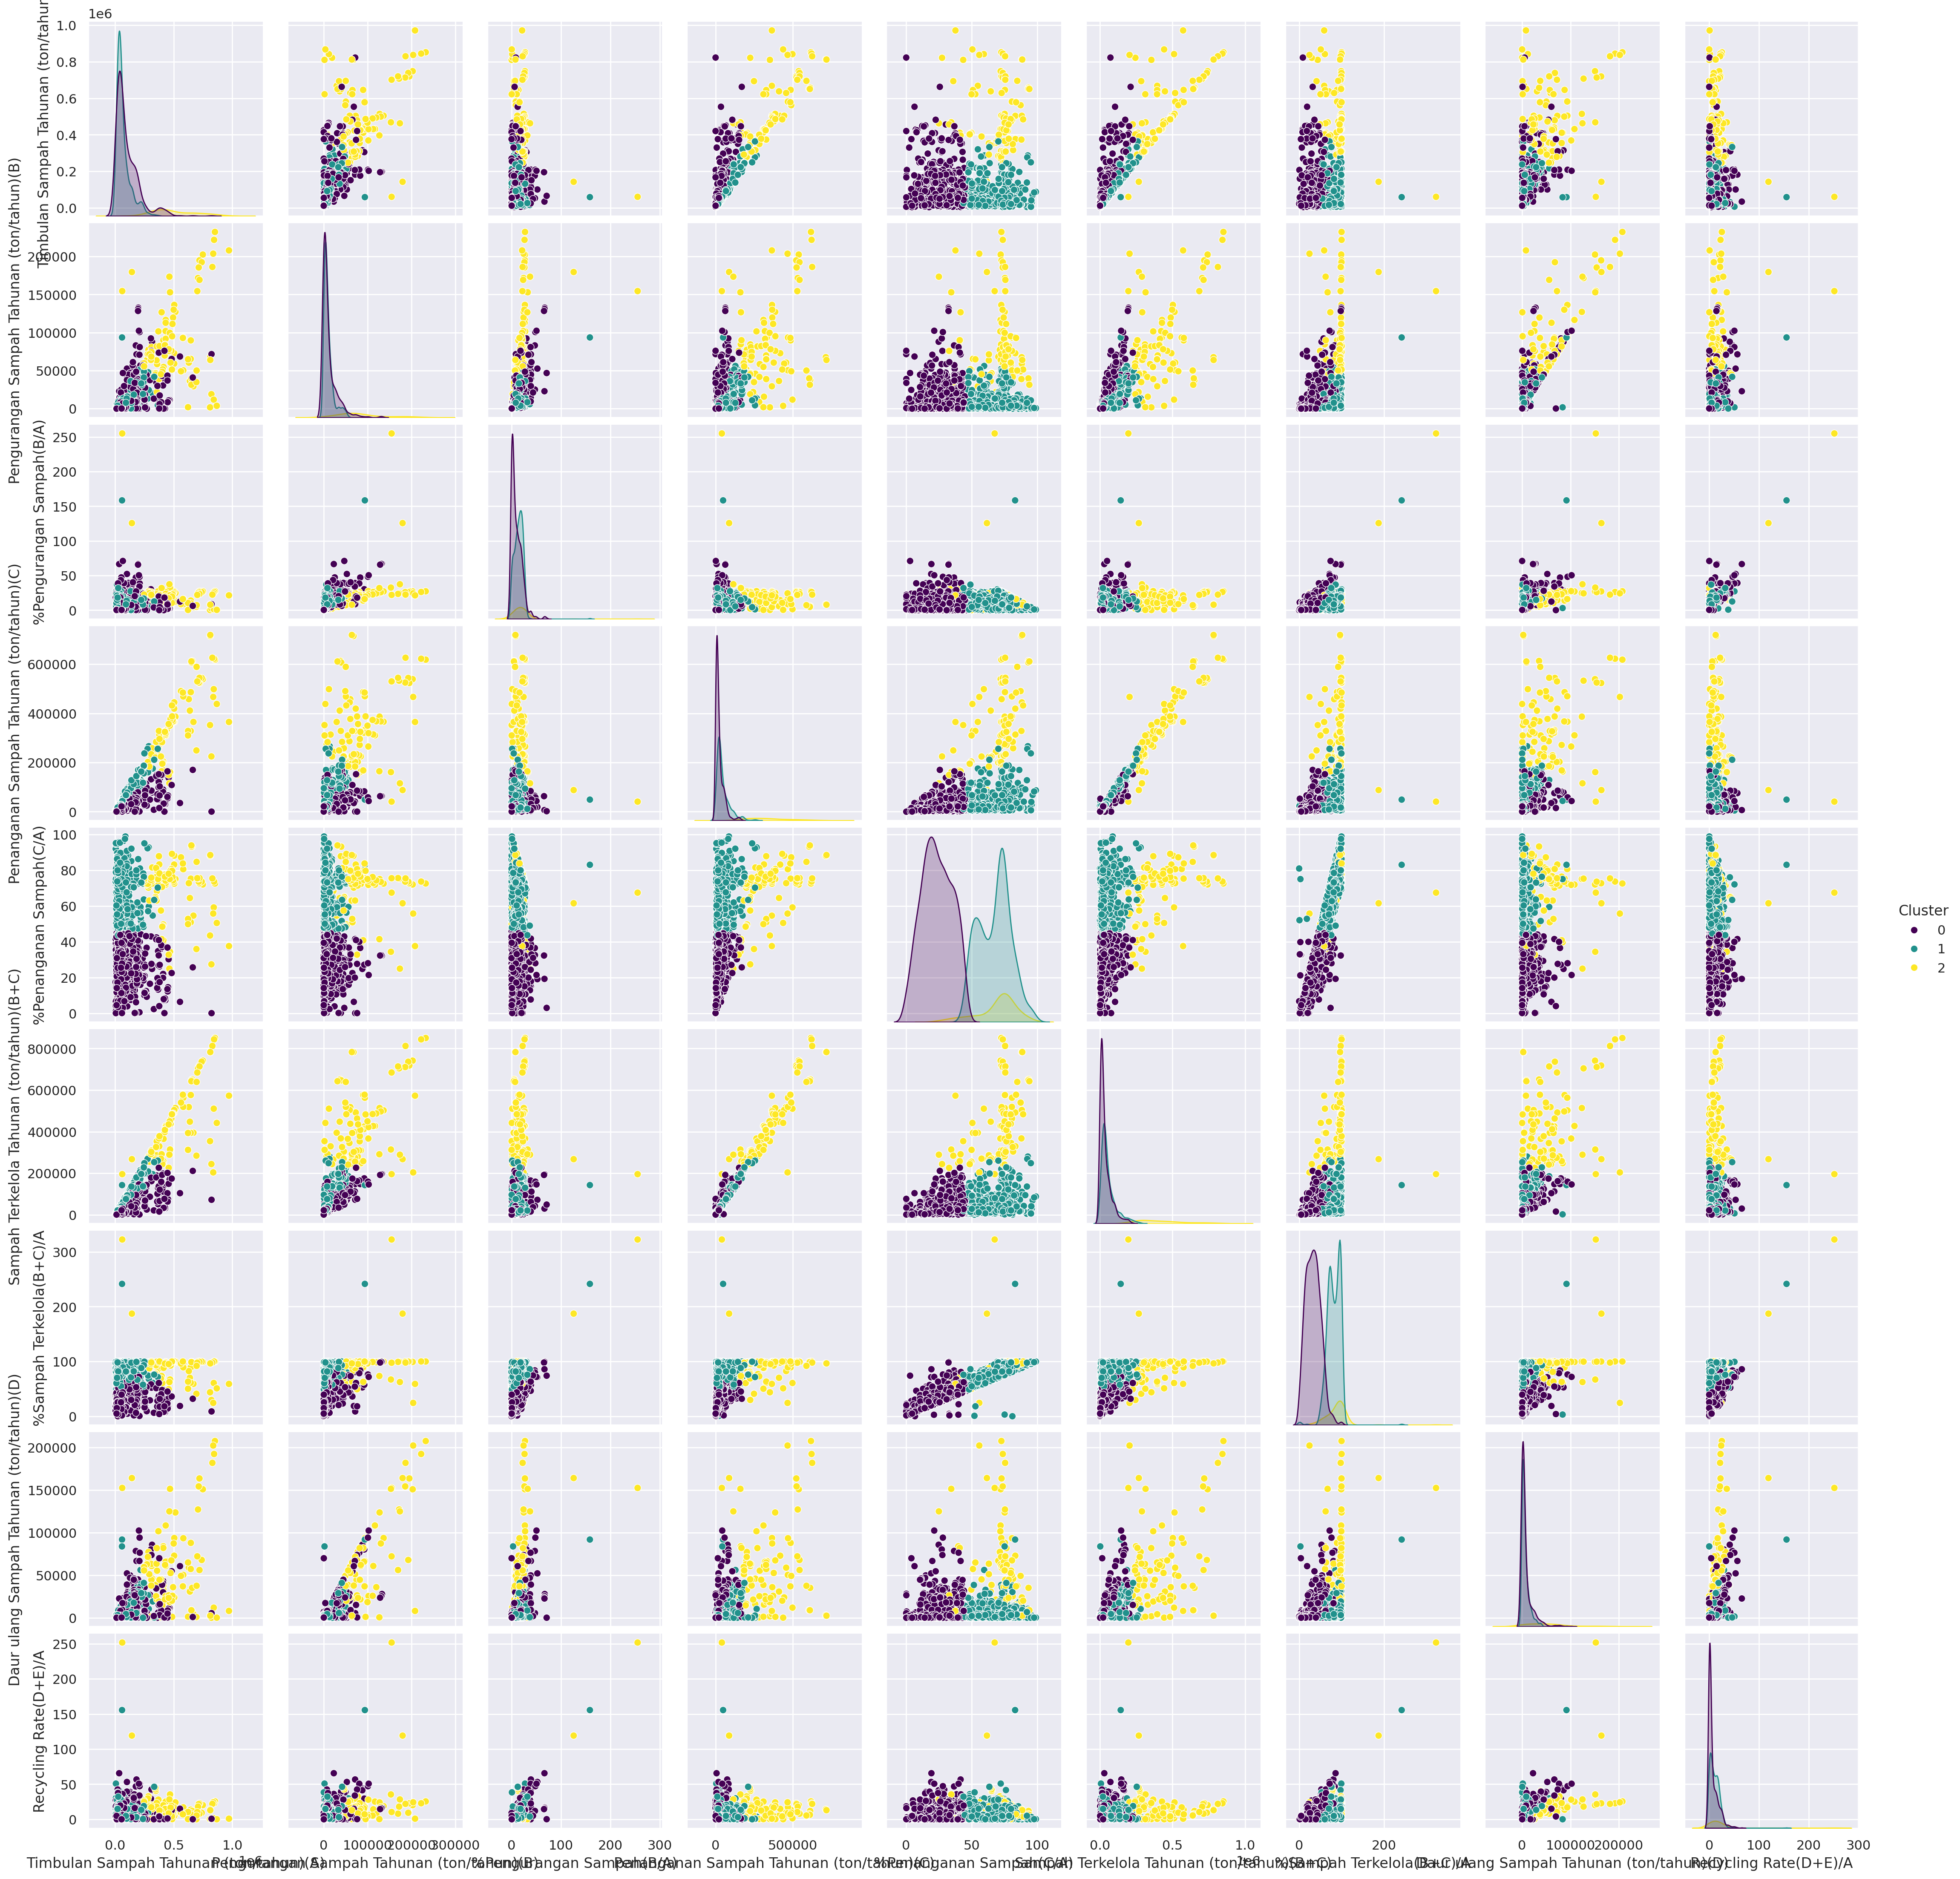

In [ ]:
sns.pairplot(data, vars=features, hue='Cluster', palette='viridis')
plt.show()

***Penjelasan atau Deskripsi:***

Visualisasi pairplot diatas menunjukkan bahwa cluster 0 (ungu) didominasi oleh data dengan nilai rendah, mengindikasikan daerah dengan volume sampah dan pengelolaan yang minim. Cluster 1 (hijau) memiliki nilai fitur yang moderat, menggambarkan kinerja pengelolaan sampah yang cukup baik, sementara cluster 2 (kuning) secara konsisten berada di nilai tertinggi, merepresentasikan daerah dengan tantangan besar dalam pengelolaan sampah namun kemungkinan memiliki infrastruktur lebih baik. Korelasi linear terlihat jelas antara fitur seperti Timbulan Sampah Tahunan dan Pengelolaan Sampah Tahunan, tetapi fitur seperti Recycling Rate tidak menunjukkan hubungan signifikan dengan fitur lainnya. Tumpang tindih antara cluster 0 dan 1 menunjukkan bahwa pemisahan antar cluster belum sepenuhnya tegas, dan distribusi data yang skewed pada beberapa fitur menyarankan perlunya transformasi data untuk analisis lebih mendalam.

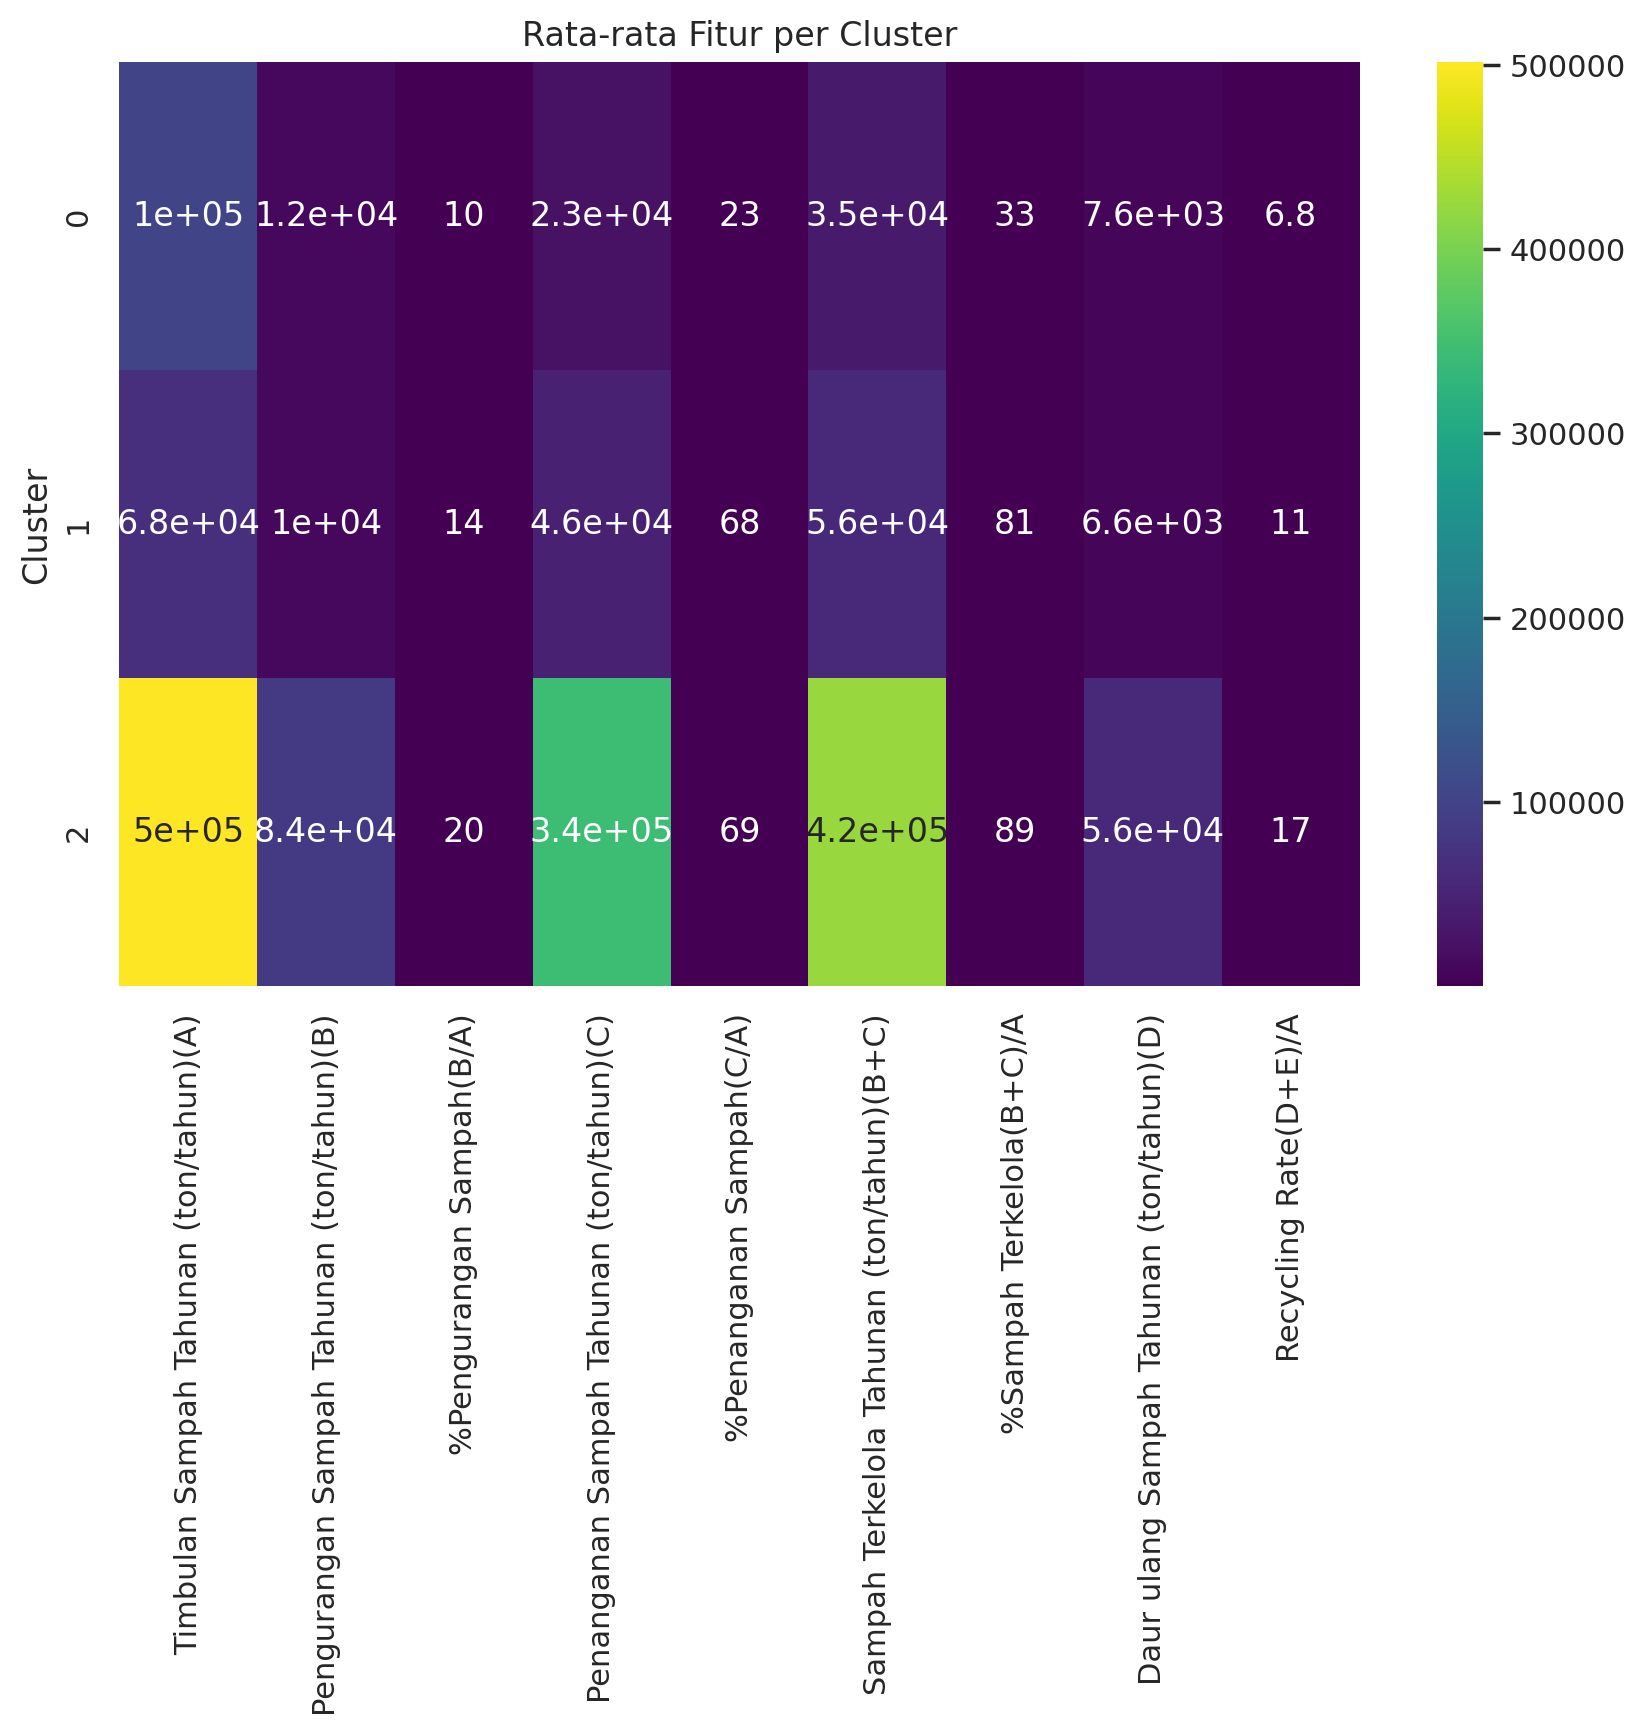

In [ ]:
# Hitung rata-rata tiap fitur per cluster
cluster_means = data.groupby('Cluster')[features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Rata-rata Fitur per Cluster')
plt.show()

***Penjelasan atau Deskripsi:***

Heatmap menunjukkan bahwa cluster 0 memiliki rata-rata yang rendah di semua fitur, mengindikasikan area dengan pengelolaan sampah minimal. Cluster 1 memiliki nilai moderat pada hampir semua fitur, menunjukkan tingkat pengelolaan sampah yang lebih baik namun tidak optimal, seperti persentase pengelolaan sampah (%Penanganan Sampah) yang lebih tinggi dibanding cluster 0, tetapi masih berada di bawah cluster 2. Cluster 2 menunjukkan rata-rata tertinggi, terutama pada fitur seperti Timbulan Sampah Tahunan, %Sampah Terkelola, dan Daur Ulang Sampah, mencerminkan area dengan volume sampah tinggi yang juga memiliki pengelolaan sampah lebih baik. Perbedaan signifikan pada nilai Recycling Rate di cluster 2 dibanding cluster lainnya mengindikasikan fokus daur ulang di area tersebut. Pola ini menunjukkan bahwa cluster 2 memerlukan perhatian pada strategi pengelolaan sampah yang lebih efisien, sementara cluster 0 mungkin membutuhkan penguatan infrastruktur dasar pengelolaan sampah.

***

In [ ]:
for cluster in range(k_optimal):
    print(f"\nCluster {cluster}:")
    print(data[data['Cluster'] == cluster].describe())


Cluster 0:
       Timbulan Sampah Tahunan (ton/tahun)(A)  \
count                              735.000000   
mean                            101035.849184   
std                             100913.282045   
min                               4143.330000   
25%                              30576.780000   
50%                              63928.400000   
75%                             142970.790000   
max                             822585.190000   

       Pengurangan Sampah Tahunan (ton/tahun)(B)  %Pengurangan Sampah(B/A)  \
count                                 735.000000                735.000000   
mean                                11588.028481                 10.087324   
std                                 18002.890901                 11.022727   
min                                     0.000000                  0.000000   
25%                                   462.240000                  1.015000   
50%                                  4129.220000                  6.450000   


***Penjelasan atau Deskripsi:***

Hasil analisis statistik deskriptif menunjukkan bahwa Cluster 0 memiliki rata-rata timbulan sampah tahunan sebesar 101.036 ton/tahun, dengan persentase pengelolaan sampah (pengurangan dan penanganan) rata-rata sebesar 32,92%. Cluster 1 menunjukkan tingkat pengelolaan sampah yang lebih tinggi dengan rata-rata 81,29% dari timbulan sebesar 68.284 ton/tahun, didominasi oleh penanganan sampah (67,56%). Sementara itu, Cluster 2 mencatat timbulan sampah tertinggi rata-rata 501.543 ton/tahun, dengan pengelolaan sampah mencapai 89,11%, didorong oleh penanganan sampah yang signifikan (69,20%). Cluster 2 juga memiliki tingkat daur ulang tertinggi dengan rata-rata recycling rate sebesar 17,41%, menunjukkan pengelolaan yang lebih efisien dibandingkan dua cluster lainnya. Distribusi data ini mencerminkan variasi kapasitas dan efisiensi pengelolaan sampah di masing-masing cluster, dengan Cluster 2 sebagai pengelola terbaik berdasarkan rata-rata sampah terkelola.

In [ ]:
#Evaluasi model clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
score = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.482405927839538


***Penjelasan atau Deskripsi:***

Hasil evaluasi model clustering menunjukkan Silhouette Score sebesar 0.482, yang mengindikasikan bahwa kualitas cluster tergolong sedang, dengan tingkat pemisahan antar cluster dan kohesi dalam cluster cukup baik namun belum optimal.

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.7441412780099924


***Penjelasan atau Deskripsi:***

Davies-Bouldin Index sebesar 0.744 mengindikasikan bahwa cluster memiliki tingkat keseragaman yang baik, di mana nilai yang mendekati satu menunjukkan bahwa cluster lebih terisolasi satu sama lain. Kombinasi kedua metrik ini mencerminkan bahwa pendekatan clustering yang digunakan berhasil mengelompokkan kabupaten/kota berdasarkan kinerja pengelolaan sampah dengan cukup baik.

In [ ]:
# Menampilkan daftar kabupaten/kota per cluster
for cluster in range(k_optimal):
    print(f"\nKabupaten/Kota di Cluster {cluster}:")
    df['Cluster'] = data['Cluster']
    cluster_members = df[df['Cluster'] == cluster]['Kabupaten/Kota'].unique()
    for member in cluster_members:
        print(member)


Kabupaten/Kota di Cluster 0:
Kab. Aceh Selatan
Kab. Aceh Tenggara
Kab. Aceh Timur
Kab. Pidie
Kab. Aceh Utara
Kab. Simeulue
Kab. Aceh Singkil
Kab. Bireuen
Kab. Aceh Barat Daya
Kab. Aceh Tamiang
Kab. Bener Meriah
Kab. Pidie Jaya
Kab. Nias
Kab. Langkat
Kab. Simalungun
Kab. Labuhanbatu
Kab. Toba
Kab. Mandailing Natal
Kab. Pesisir Selatan
Kab. Solok
Kab. Sijunjung
Kab. Tanah Datar
Kab. Padang Pariaman
Kab. Agam
Kab. Lima Puluh Kota
Kab. Pasaman
Kab. Solok Selatan
Kab. Indragiri Hulu
Kab. Rokan Hulu
Kab. Rokan Hilir
Kab. Siak
Kab. Kuantan Singingi
Kab. Tebo
Kab. Muara Enim
Kab. Lahat
Kab. Musi Banyuasin
Kab. Ogan Komering Ulu Timur
Kab. Ogan Ilir
Kab. Musi Rawas Utara
Kab. Rejang Lebong
Kab. Bengkulu Utara
Kab. Seluma
Kab. Lebong
Kab. Bengkulu Tengah
Kab. Lampung Tengah
Kab. Tulang Bawang
Kab. Tanggamus
Kab. Lampung Timur
Kab. Way Kanan
Kab. Pesawaran
Kab. Pringsewu
Kab. Tulang Bawang Barat
Kab. Pesisir Barat
Kab. Bangka Barat
Kab. Natuna
Kab. Kepulauan Anambas
Kab. Garut
Kab. Ciamis
Kab. K

***Karakteristik Setiap Cluster:***


1.   **Cluster 0: mewakili daerah dengan pengelolaan sampah yang sangat minim.** Volume sampah yang dihasilkan relatif rendah (rata-rata 101.036 ton/tahun), dan hanya sekitar 32,92% dari sampah yang berhasil dikelola melalui pengurangan dan penanganan. Daerah dalam cluster ini mungkin memiliki infrastruktur pengelolaan sampah yang terbatas dan perlu perhatian untuk meningkatkan fasilitas serta implementasi pengelolaan sampah yang lebih baik.
2.   **Cluster 1: menggambarkan daerah dengan pengelolaan sampah yang cukup baik**, meskipun belum optimal. Rata-rata volume sampah yang dihasilkan adalah 68.284 ton/tahun, dan sekitar 81,29% sampah berhasil dikelola, dengan dominasi penanganan sampah (67,56%). Meskipun sudah ada upaya yang cukup baik dalam pengelolaan, ada ruang untuk perbaikan lebih lanjut, terutama dalam meningkatkan tingkat daur ulang dan pengurangan sampah.
3. **Cluster 2: mewakili daerah dengan pengelolaan sampah yang paling efisien** dan tantangan terbesar dalam pengelolaan sampah. Daerah dalam cluster ini menghasilkan sampah dalam jumlah besar (rata-rata 501.543 ton/tahun) dan memiliki tingkat pengelolaan sampah yang sangat tinggi (89,11%), didorong oleh penanganan sampah yang signifikan (69,20%). Selain itu, cluster ini mencatat tingkat daur ulang yang tertinggi (17,41%), menunjukkan bahwa daerah ini memiliki infrastruktur yang lebih baik dalam mengelola sampah dan menerapkan kebijakan daur ulang yang lebih efektif. (dapat dilihat dari hasil pengelompokkan kabupaten/ kota, Cluster 2 didominasi oleh Kota-Kota besar dan seluruh daerah di DKI Jakarta)



